<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/ko/part_1/02_딥러닝의 수학.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 2. 딥 러닝의 수학

>  "모든 수는 단위들로 이루어져 있고, 모든 수는 단위들로 나눌 수 있다" - 알 콰리즈미 (780-850), 페르시아의 수학자

이 장에서는 딥러닝의 핵심을 이루는 수학적 개념들을 살펴보겠습니다. 딥러닝 모델은 복잡한 수학적 함수의 조합으로 이루어져 있습니다. 선형대수, 미적분, 확률 및 통계에 대한 깊이 있는 이해는 모델의 동작 원리를 파악하고, 성능을 개선하며, 새로운 모델을 설계하는 데 필수적입니다. 예를 들어, 행렬 연산에 대한 이해는 Convolutional Neural Network (CNN)의 동작 방식을 이해하는 데 중요하며, 미분과 최적화는 모델의 학습 과정을 이해하는 데 핵심적인 역할을 합니다.

이번 장이 어렵게 느껴지는 경우 다음장으로 넘어가도 됩니다. 수시로 되돌아와서 익숙해지는 것이 좋습니다.

## 2.1 선형대수학 기초

선형대수학은 딥러닝의 가장 기초입니다. 행렬 연산부터 고급 최적화 기법에 이르기까지 선형대수는 필수적인 도구입니다. 이 섹션에서는 벡터, 행렬, 텐서 등의 기본 개념부터 시작하여 특이값 분해와 주성분 분석과 같은 고급 주제까지 다룰 것입니다.

### 2.1.1 벡터
벡터와 행렬은 데이터를 표현하고 각 데이터를 변환하는 가장 기본이 되는 연산입니다. 

**벡터의 기본**

벡터는 크기와 방향을 가진 양을 나타내는 수학적 객체입니다. 수학적 정의는 동일합니다. 대신 응용분야 마다 바라보는 관점이 약간 다릅니다.

* 수학적 관점: 수학에서 벡터는 크기와 방향을 가진 추상적인 객체로 정의됩니다. 벡터 공간의 원소로서, 덧셈과 스칼라 곱에 대해 닫혀 있는 특성을 갖습니다.
* 물리학적 관점: 물리학에서 벡터는 주로 힘, 속도, 가속도와 같은 물리량을 표현하는 데 사용됩니다. 이 경우 벡터의 크기와 방향은 실제 물리적 의미를 갖습니다. 물리학은 모든 변화를 벡터로 다루며, 벡터의 차원도 제한적입니다. 대표적으로 공간은 3차원, 시공간의 경우 4차원을 가집니다.
* 컴퓨터 과학적 관점: 컴퓨터 과학, 특히 기계학습과 딥러닝에서 벡터는 주로 데이터의 특성(feature)을 표현하는 데 사용됩니다. 여기서 벡터의 각 요소는 데이터의 특정 속성을 나타내며, 반드시 물리적인 방향성을 갖지 않을 수 있습니다. 특성을 표현하기 위해 벡터 차원은 수십에서 수천차원을 가질 수 있습니다.

이러한 다양한 관점을 이해하는 것은 딥러닝에서 벡터를 다룰 때 중요합니다. 딥러닝에서 벡터는 주로 컴퓨터 과학적 관점에서 사용되지만, 수학적 연산과 물리적 직관도 같이 활용합니다.

딥러닝에서 벡터는 주로 데이터의 여러 특성(features)을 동시에 표현하는 데 사용됩니다. 예를 들어, 주택 가격 예측 모델에서 사용되는 5차원 벡터는 다음과 같이 표현할 수 있습니다.

$\mathbf{v} = \begin{bmatrix} v_1 \ v_2 \ v_3 \ v_4 \ v_5 \end{bmatrix}$

이 벡터의 각 요소는 주택의 다양한 특성을 나타냅니다.
$v_1$: 주택의 면적 (제곱미터), $v_2$: 방의 개수, $v_3$: 주택의 나이 (년), $v_4$: 주변 학교까지의 거리 (킬로미터), $v_5$: 범죄율 (백분율)

딥러닝 모델은 이러한 다차원 벡터를 입력으로 주택 가격을 예측할 수 있습니다. 이처럼 벡터는 복잡한 실제 데이터의 여러 특성을 효과적으로 표현하고 처리하는 데 사용됩니다.

넘파이에서 벡터는 손쉽게 생성해서 사용할 수 있습니다.

In [ ]:
!pip install dldna[colab] # in Colab

# !pip install dldna[all] # in your local

In [1]:
import numpy as np

# Vector creation
v = np.array([1, 2, 3])

# Vector magnitude (L2 norm)
magnitude = np.linalg.norm(v)
print(f"Vector magnitude: {magnitude}")

# Vector normalization
normalized_v = v / magnitude
print(f"Normalized vector: {normalized_v}")

Vector magnitude: 3.7416573867739413
Normalized vector: [0.26726124 0.53452248 0.80178373]


벡터의 개념을 좀 더 깊이 살펴보면, 행벡터와 열벡터의 구분, 그리고 물리학과 공학에서 사용되는 공변벡터와 반변벡터의 개념이 있습니다.

**행벡터와 열벡터**

벡터는 일반적으로 열벡터를 기본으로 표현합니다. 행벡터는 열벡터의 전치(transpose)로 간주할 수 있습니다. 수학적으로 더 정확히 말하면, 행벡터는 듀얼 벡터 또는 공변벡터(covector)라고 부를 수 있습니다.

열벡터: $\mathbf{v} = \begin{bmatrix} v_1 \ v_2 \ v_3 \end{bmatrix}$,  행벡터: $\mathbf{v}^T = [v_1 \quad v_2 \quad v_3]$

행벡터와 열벡터는 서로 다른 성질을 가지고 있습니다. 행벡터는 열벡터에 대해 선형 함수로 작용하여 스칼라를 생성합니다. 이는 내적 연산으로 표현됩니다.

$$\mathbf{u}^T\mathbf{v} = u_1v_1 + u_2v_2 + u_3v_3$$

**공변벡터와 반변벡터**

물리학과 공학에서는 공변벡터(covariant vector)와 반변벡터(contravariant vector)의 개념이 중요하게 다뤄집니다. 이는 좌표계 변환에 따른 벡터의 변환 특성을 나타냅니다.

- 반변벡터: 좌표계가 변할 때 기저의 역방향으로 변환되는 벡터입니다. 일반적으로 위첨자로 표기합니다 (예: $v^i$).
- 공변벡터: 좌표계가 변할 때 기저와 같은 방향으로 변환되는 벡터입니다. 일반적으로 아래첨자로 표기합니다 (예: $v_i$).

텐서 표기법에서 이러한 구분은 중요합니다. 예를 들어, $T^i_j$는 상단 인덱스 $i$가 반변성을, 하단 인덱스 $j$가 공변성을 나타냅니다. 대표적으로 일반상대론에서 이러한 공변, 반변성은 매우 중요한 개념으로 다뤄집니다. 

**딥러닝에서의 적용**

딥러닝에서는 이러한 공변성과 반변성의 구분이 명시적으로 강조되지 않는 경우가 많습니다. 그 이유는 다음과 같습니다.

1. 표준화된 데이터 표현: 딥러닝에서는 대부분의 경우 데이터를 표준화된 형태(예: 열벡터)로 다루므로, 공변성과 반변성의 구분이 덜 중요해집니다.
2. 유클리드 공간 가정: 많은 딥러닝 모델은 데이터가 유클리드 공간에 있다고 가정합니다. 이 공간에서는 공변성과 반변성의 구분이 명확하지 않습니다.
3. 연산의 단순화: 딥러닝의 주요 연산(예: 행렬 곱, 활성화 함수 적용)은 이러한 구분 없이도 효과적으로 수행될 수 있습니다.
4. 자동 미분: 현대 딥러닝 프레임워크의 자동 미분 기능은 이러한 세부적인 구분 없이도 정확한 그래디언트를 계산할 수 있습니다.

그러나 특정 분야, 특히 물리 기반 머신러닝이나 기하학적 딥러닝에서는 이러한 개념이 여전히 중요할 수 있습니다. 예를 들어, 미분기하학을 활용한 딥러닝 모델에서는 공변성과 반변성의 구분이 모델의 설계와 해석에 중요한 역할을 할 수 있습니다.

결론적으로, 딥러닝에서 벡터의 기본 개념은 단순화되어 사용되지만, 더 복잡한 수학적 개념은 고급 모델 설계와 특수한 응용 분야에서 여전히 중요한 역할을 합니다. 

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥다이브: 벡터 공간과 선형 결합)"}

### 벡터 공간과 선형 결합

선형대수학의 핵심 개념인 벡터 공간(vector space)은 딥러닝에서 데이터를 표현하고 변환하는 기본적인 틀을 제공합니다. 이 딥다이브에서는 벡터 공간의 엄밀한 정의와 관련 개념들을 살펴보고, 딥러닝에서의 응용 예시를 제시합니다.

#### 벡터 공간 (Vector Space)

벡터 공간은 다음 8가지 공리(axiom)를 만족하는 집합 $V$와, 덧셈(addition) 및 스칼라 곱(scalar multiplication) 연산으로 구성됩니다. 여기서 $V$의 원소를 벡터(vector)라고 부르고, 스칼라(scalar)는 실수(real number) $\mathbb{R}$ 또는 복소수(complex number) $\mathbb{C}$ 집합의 원소입니다. (딥러닝에서는 주로 실수를 사용합니다.)

**벡터 덧셈 (Vector Addition):**  $V$의 임의의 두 원소 $\mathbf{u}, \mathbf{v}$에 대해, $\mathbf{u} + \mathbf{v}$도 $V$의 원소입니다. (덧셈에 대해 닫혀있다, closed under addition)

**스칼라 곱 (Scalar Multiplication):** $V$의 임의의 원소 $\mathbf{u}$와 스칼라 $c$에 대해, $c\mathbf{u}$도 $V$의 원소입니다. (스칼라 곱에 대해 닫혀있다, closed under scalar multiplication)

**벡터 덧셈과 스칼라 곱은 다음 8가지 공리를 만족해야 합니다.**  ($\mathbf{u}, \mathbf{v}, \mathbf{w} \in V$, $c, d$: 스칼라)

1.  **덧셈의 교환 법칙 (Commutativity of addition):** $\mathbf{u} + \mathbf{v} = \mathbf{v} + \mathbf{u}$
2.  **덧셈의 결합 법칙 (Associativity of addition):** $(\mathbf{u} + \mathbf{v}) + \mathbf{w} = \mathbf{u} + (\mathbf{v} + \mathbf{w})$
3.  **덧셈의 항등원 (Additive identity):** 모든 $\mathbf{u} \in V$에 대해 $\mathbf{u} + \mathbf{0} = \mathbf{u}$를 만족하는 $\mathbf{0} \in V$ (영벡터, zero vector)가 존재합니다.
4.  **덧셈의 역원 (Additive inverse):** 각 $\mathbf{u} \in V$에 대해 $\mathbf{u} + (-\mathbf{u}) = \mathbf{0}$를 만족하는 $-\mathbf{u} \in V$ (덧셈의 역원)가 존재합니다.
5.  **스칼라 곱의 분배 법칙 (Distributivity of scalar multiplication with respect to vector addition):** $c(\mathbf{u} + \mathbf{v}) = c\mathbf{u} + c\mathbf{v}$
6.  **스칼라 곱의 분배 법칙 (Distributivity of scalar multiplication with respect to scalar addition):** $(c + d)\mathbf{u} = c\mathbf{u} + d\mathbf{u}$
7.  **스칼라 곱의 결합 법칙 (Compatibility of scalar multiplication with scalar multiplication):** $c(d\mathbf{u}) = (cd)\mathbf{u}$
8.  **스칼라 곱의 항등원 (Identity element of scalar multiplication):** $1\mathbf{u} = \mathbf{u}$ (여기서 1은 스칼라 곱의 항등원)

**예시:**

*   $\mathbb{R}^n$: $n$차원 실수 벡터 공간 (n-tuples of real numbers)
*   $\mathbb{C}^n$: $n$차원 복소수 벡터 공간
*   $M_{m \times n}(\mathbb{R})$: $m \times n$ 실수 행렬 공간
*   $P_n$: $n$차 이하의 실수 계수 다항식 공간
*   $C[a, b]$: 구간 $[a, b]$에서 연속인 실수값 함수들의 공간

#### 부분 공간 (Subspace)

벡터 공간 $V$의 부분 집합 $W$가 다음 조건을 만족하면 $W$를 $V$의 부분 공간이라고 합니다.

1.  $\mathbf{0} \in W$ (영벡터를 포함)
2.  $\mathbf{u}, \mathbf{v} \in W$ 이면, $\mathbf{u} + \mathbf{v} \in W$ (덧셈에 대해 닫혀있다)
3.  $\mathbf{u} \in W$ 이고 $c$가 스칼라이면, $c\mathbf{u} \in W$ (스칼라 곱에 대해 닫혀있다)

즉, 부분 공간은 벡터 공간의 부분 집합이면서, 그 자체로 벡터 공간의 성질을 만족하는 것입니다.

#### 선형 결합 (Linear Combination)

벡터 공간 $V$의 벡터 $\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k$와 스칼라 $c_1, c_2, ..., c_k$에 대해, 다음 형태의 식을 선형 결합이라고 합니다.

$c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + ... + c_k\mathbf{v}_k$

#### 선형 독립 (Linear Independence)과 선형 종속 (Linear Dependence)

벡터들의 집합 {$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k$}이 다음 조건을 만족하면 *선형 독립*(linearly independent)이라고 합니다.

$c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + ... + c_k\mathbf{v}_k = \mathbf{0}$ 이면, 반드시 $c_1 = c_2 = ... = c_k = 0$

위 조건을 만족하지 않으면(즉, 모두 0이 아닌 스칼라 $c_1, ..., c_k$가 존재하여 위 식을 만족시키면), 이 벡터들의 집합은 *선형 종속*(linearly dependent)이라고 합니다.

**직관적인 의미:**

*   **선형 독립:** 벡터들을 "서로 다른 방향"으로 뻗어 나가는 것으로 생각할 수 있습니다. 어떤 벡터도 다른 벡터들의 선형 결합으로 표현될 수 없습니다.
*   **선형 종속:** 벡터들 중 일부가 "같은 방향" (또는 "평면", "초평면")에 놓여 있는 것으로 생각할 수 있습니다. 어떤 벡터가 다른 벡터들의 선형 결합으로 표현될 수 있습니다.

#### 기저 (Basis)와 차원 (Dimension)

*   **기저 (Basis):** 벡터 공간 $V$의 *기저*는 다음 두 조건을 만족하는 벡터들의 집합입니다.
    1.  선형 독립입니다.
    2.  $V$를 span합니다 (아래 span 설명 참조).
*   **차원 (Dimension):** 벡터 공간의 기저에 있는 벡터의 개수를 *차원*이라고 합니다. (dim $V$)

**핵심:** 주어진 벡터 공간의 기저는 유일하지 않지만, 모든 기저는 동일한 개수의 벡터를 가집니다.

#### Span

벡터들의 집합 {$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k$}의 *span*은 이 벡터들의 모든 가능한 선형 결합의 집합입니다.

span{$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_k$} = {$c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + ... + c_k\mathbf{v}_k$ | $c_1, c_2, ..., c_k$는 스칼라}

즉, 주어진 벡터들을 사용하여 만들 수 있는 모든 벡터의 집합입니다.  Span은 항상 부분 공간이 됩니다.

#### 딥러닝에서의 벡터 공간 예시

*   **특징 벡터 (Feature Vector):** 이미지, 텍스트, 오디오 등 딥러닝 모델의 입력 데이터는 종종 고차원 벡터로 표현됩니다. 예를 들어, 28x28 픽셀 크기의 흑백 이미지는 784차원 벡터로 표현될 수 있습니다. 각 차원은 이미지의 특정 픽셀의 밝기 값을 나타냅니다.
*   **가중치 벡터 (Weight Vector):** 신경망의 각 층(layer)은 가중치 행렬(weight matrix)과 편향 벡터(bias vector)로 구성됩니다. 가중치 행렬의 각 행(또는 열)은 특정 뉴런의 가중치를 나타내는 벡터로 볼 수 있습니다.
*   **임베딩 벡터 (Embedding Vector):** 단어, 사용자, 아이템 등을 저차원 벡터 공간에 표현하는 데 사용됩니다. Word2Vec, GloVe, BERT 등은 단어를 벡터로 표현하는 대표적인 임베딩 기법입니다.
*   **잠재 공간 (Latent Space):** 오토인코더(Autoencoder), 변분 오토인코더(Variational Autoencoder, VAE), 생성적 적대 신경망(Generative Adversarial Network, GAN) 등은 데이터를 저차원의 잠재 공간에 매핑하는 방법을 학습합니다. 이 잠재 공간도 벡터 공간으로 볼 수 있습니다.

:::

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥다이브: 노름과 거리 - 딥러닝 관점)"}

### 딥러닝에서의 노름과 거리

벡터의 크기(magnitude)나 두 벡터 사이의 거리(distance)를 측정하는 것은 딥러닝에서 매우 중요합니다. 손실 함수, 정규화(regularization), 유사도 측정 등 다양한 곳에 활용됩니다.

#### 노름 (Norm)

벡터 $\mathbf{x} = [x_1, x_2, ..., x_n]$의 Lp-norm은 다음과 같이 정의됩니다 ($p \ge 1$).

$||\mathbf{x}||_p = \left( \sum_{i=1}^{n} |x_i|^p \right)^{1/p}$

*   **L1-norm ($p=1$):**  $||\mathbf{x}||_1 = \sum_{i=1}^{n} |x_i|$ (Manhattan distance, Taxicab norm)
    *   **특징:** 각 요소의 절댓값의 합.  특징 벡터의 각 요소의 크기가 중요할 때 유용.
    *   **딥러닝 활용:** L1 정규화 (Lasso regression)는 가중치의 절댓값 합을 제한하여 희소한(sparse) 모델(일부 가중치가 0)을 만드는 데 사용.

*   **L2-norm ($p=2$):**  $||\mathbf{x}||_2 = \sqrt{\sum_{i=1}^{n} x_i^2}$ (Euclidean norm)
    *   **특징:** 원점에서 벡터 좌표까지의 직선 거리 (피타고라스 정리). 가장 널리 사용되는 노름.
    *   **딥러닝 활용:** L2 정규화 (Ridge regression)는 가중치의 제곱합을 제한하여 가중치가 너무 커지는 것을 방지(overfitting 방지). 가중치 감쇠(weight decay)라고도 함.

*   **L∞-norm ($p \to \infty$):** $||\mathbf{x}||_\infty = \max_i |x_i|$
    * **특징:** 벡터 요소 중 절댓값이 가장 큰 값.
    * **딥러닝 활용:** (덜 일반적) 특정 요소의 값이 너무 커지는 것을 제한하고 싶을 때 사용.

#### 거리 (Distance)

두 벡터 $\mathbf{x}$와 $\mathbf{y}$ 사이의 거리는 일반적으로 두 벡터의 차이의 노름으로 정의됩니다.

$d(\mathbf{x}, \mathbf{y}) = ||\mathbf{x} - \mathbf{y}||$

*   **L1 거리:**  $d(\mathbf{x}, \mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_1 = \sum_{i=1}^{n} |x_i - y_i|$
*   **L2 거리:**  $d(\mathbf{x}, \mathbf{y}) = ||\mathbf{x} - \mathbf{y}||_2 = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$

**딥러닝에서의 활용 예시:**

*   **손실 함수:** MSE (L2 Loss), MAE (L1 Loss)
*   **정규화:** L1 regularization, L2 regularization (weight decay)
*   **유사도/거리 기반 학습:** k-NN, SVM, Siamese Network, Triplet Network, Contrastive Learning
*   **임베딩:** 단어, 사용자, 아이템 등을 벡터 공간에 표현하고, 벡터 간 거리를 통해 유사도/관련성을 파악
*   **이상치 탐지 (Outlier Detection):** 데이터 포인트 간의 거리를 기반으로 이상치 탐지.

**참고:**  딥러닝에서는 "거리"와 "유사도(similarity)"를 구분하는 것이 중요합니다.  거리는 작을수록 유사도가 높고, 유사도는 클수록 가깝습니다.  코사인 유사도(cosine similarity)는 딥러닝에서 자주 사용되는 유사도 측정 방법 중 하나입니다.

:::

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥다이브: 아핀 공간)"}

### 아핀 공간 (Affine Space)

아핀 공간(Affine Space)은 선형대수학의 벡터 공간(Vector Space) 개념을 일반화한 것으로, 기하학적 관점에서 딥러닝 모델을 이해하는 데 유용한 도구입니다. 특히, 아핀 변환(Affine Transformation)은 딥러닝에서 자주 사용되는 선형 변환에 편향(bias)을 추가한 형태를 나타냅니다.

#### 아핀 공간의 정의

아핀 공간은 (점들의 집합, 벡터 공간, 점과 벡터의 덧셈)의 세 요소로 구성된 구조입니다. 좀 더 구체적으로,

*   **점들의 집합 ($\mathcal{A}$):**  기하학적 객체(점)들의 집합입니다. 벡터 공간과 달리, *원점(origin)이 고정되어 있지 않습니다*.
*   **벡터 공간 ($V$):**  점들 간의 *변위(displacement)* 또는 *차이(difference)*를 나타내는 벡터들의 집합입니다.  벡터 공간의 모든 성질(덧셈, 스칼라 곱, 8가지 공리)을 만족합니다.
*   **점과 벡터의 덧셈 ($\mathcal{A} \times V \to \mathcal{A}$):** 점 $P \in \mathcal{A}$와 벡터 $\mathbf{v} \in V$를 더하여 새로운 점 $Q \in \mathcal{A}$를 얻는 연산입니다.  $Q = P + \mathbf{v}$로 표기합니다.

이 덧셈 연산은 다음 두 가지 성질을 만족해야 합니다.

1.  **임의의 점 $P \in \mathcal{A}$에 대해, $P + \mathbf{0} = P$ (여기서 $\mathbf{0}$은 벡터 공간 $V$의 영벡터)**
2.  **임의의 점 $P, Q, R \in \mathcal{A}$에 대해, $(P + \mathbf{u}) + \mathbf{v} = P + (\mathbf{u} + \mathbf{v})$ (여기서 $\mathbf{u}, \mathbf{v} \in V$)**

**중요한 특징**

*   아핀 공간에는 "원점"이라는 특별한 점이 *없습니다*. 모든 점이 동등합니다.
*   두 점 $P, Q \in \mathcal{A}$의 "차이"는 벡터 공간 $V$의 벡터로 표현됩니다: $\overrightarrow{PQ} = Q - P \in V$.  (하지만 두 점의 "합"은 정의되지 않습니다.)
*   점과 벡터의 덧셈을 통해, 한 점에서 다른 점으로 이동할 수 있습니다.

#### 아핀 결합 (Affine Combination)

아핀 공간 $\mathcal{A}$의 점 $P_1, P_2, ..., P_k$와 스칼라 $c_1, c_2, ..., c_k$가 주어졌을 때, 다음 형태의 식을 아핀 결합이라고 합니다.

$c_1P_1 + c_2P_2 + ... + c_kP_k$ (단, $c_1 + c_2 + ... + c_k = 1$)

**중요:** 일반적인 선형 결합과 달리, 아핀 결합은 *계수들의 합이 1*이어야 합니다. 이 조건은 아핀 공간의 "원점이 없다"는 성질을 반영합니다.

#### 아핀 변환 (Affine Transformation)

아핀 변환은 아핀 공간에서 아핀 공간으로의 함수로, 선형 변환과 평행 이동(translation)의 조합으로 표현됩니다. 즉, 아핀 변환은 *선형 변환*과 *편향(bias)*을 포함합니다.

$f(P) = T(P) + \mathbf{b}$

*   $T$: 선형 변환 (벡터 공간 $V$에서 $V$로의 선형 변환)
*   $\mathbf{b}$: 평행 이동 벡터 (벡터 공간 $V$의 원소)

**행렬 표현:**

아핀 변환은 확장된 행렬(augmented matrix)을 사용하여 표현할 수 있습니다. $n$차원 아핀 공간에서 $n+1$차원 벡터를 사용하면, 아핀 변환을 $(n+1) \times (n+1)$ 행렬로 나타낼 수 있습니다.

$\begin{bmatrix} \mathbf{y} \\ 1 \end{bmatrix} = \begin{bmatrix} \mathbf{A} & \mathbf{b} \\ \mathbf{0}^T & 1 \end{bmatrix} \begin{bmatrix} \mathbf{x} \\ 1 \end{bmatrix}$

*   $\mathbf{A}$: $n \times n$ 선형 변환 행렬
*   $\mathbf{b}$: $n$차원 평행 이동 벡터
*   $\mathbf{x}$: $n$차원 입력 벡터 (아핀 공간의 점)
*   $\mathbf{y}$: $n$차원 출력 벡터 (아핀 공간의 점)

#### 딥러닝에서의 아핀 공간과 아핀 변환

*   **Fully Connected Layer:** 딥러닝의 fully connected layer (dense layer)는 아핀 변환을 수행합니다.  $\mathbf{y} = \mathbf{W}\mathbf{x} + \mathbf{b}$ 에서 $\mathbf{W}\mathbf{x}$는 선형 변환, $\mathbf{b}$는 편향(평행 이동)을 나타냅니다.
*   **입력 공간:** 딥러닝 모델의 입력 데이터는 종종 고차원 벡터로 표현되지만, 엄밀하게는 원점이 없는 아핀 공간의 점으로 간주할 수 있습니다.  예를 들어, 이미지 데이터는 각 픽셀의 밝기 값을 요소로 갖는 벡터로 표현되지만, 이 벡터 공간에는 특별한 원점이 없습니다.
*   **특징 공간 (Feature Space):** 신경망의 각 층은 입력을 새로운 특징 공간으로 변환합니다. 이러한 변환은 종종 아핀 변환(선형 변환 + 편향)과 비선형 활성화 함수의 조합으로 이루어집니다.
*   **데이터 증강 (Data Augmentation):** 이미지 데이터에 대한 회전, 이동, 크기 조정 등은 아핀 변환으로 표현될 수 있습니다.
* **Affine Layer**: 선형변환과 달리 bias를 고려한다.

#### Bias 를 사용하지 않는 딥러닝 모델

최근 딥러닝 연구에서는 계산 효율성, 모델 해석 가능성, 또는 특정 이론적 배경을 바탕으로 편향(bias) 항을 제거한 모델들이 제안되기도 합니다.

*   **DeepMind의 MuZero (2020):** 강화 학습 모델인 MuZero는 policy network와 value network에서 bias를 사용하지 않습니다. 논문에서는 bias를 제거함으로써 representation learning에 도움이 된다고 언급합니다.
* **OpenAI의 GPT (Generative Pre-trained Transformer) 계열**: 일부 연구 및 구현에서, 계산 효율성을 위해 bias 항을 제거하기도 합니다. 하지만, 모든 GPT 계열 모델이 bias를 사용하지 *않는 것은 아닙니다.*  GPT-3 등 대규모 모델에서는 여전히 bias를 사용하는 경우가 많습니다.
* **No-Bias Networks**:  일부 연구에서는 bias를 제거하는 것이 모델의 일반화 성능에 어떤 영향을 미치는지 체계적으로 분석하기도 합니다.

**Bias를 제거하는 이유**

*   **계산 효율성:** bias 항을 제거하면 모델의 파라미터 수가 줄어들어 계산량과 메모리 사용량이 감소합니다. 특히, 대규모 모델에서는 이러한 효과가 더 커질 수 있습니다.
*   **표현 학습 (Representation Learning):**  특정 문제에서는 bias 항이 불필요하거나 오히려 표현 학습을 방해할 수 있습니다. 예를 들어, MuZero에서는 bias가 없는 representation이 더 추상적이고 일반화된 표현을 학습하는 데 도움이 될 수 있다고 봅니다.
*   **이론적/수학적 근거:**  일부 모델(예: 특정 종류의 생성 모델)에서는 bias 항이 없는 형태가 수학적으로 더 자연스럽거나, 특정 이론적 분석에 더 적합할 수 있습니다.
* **정규화 효과**: Bias가 없다면, weight matrix가 좀 더 중요한 정보를 담도록 하는 정규화 효과가 있을 수 있다는 연구 결과도 있습니다.

**주의:** bias를 제거하는 것이 *항상* 성능 향상을 보장하는 것은 아닙니다. 문제의 특성, 모델의 구조, 데이터의 양 등에 따라 bias의 유무가 성능에 미치는 영향은 달라질 수 있습니다.

아핀 공간과 아핀 변환의 개념은 딥러닝 모델의 기하학적 해석, 일반화 성능 분석, 새로운 아키텍처 설계 등에 활용될 수 있습니다.

:::

### 2.1.2 차원, 랭크

텐서, 벡터, 행렬과 관련된 용어들은 수학, 물리학, 컴퓨터 과학 분야에서 약간씩 다르게 사용되어 혼란을 야기할 수 있습니다. 이러한 혼란을 피하기 위해 주요 개념들을 정리해보겠습니다. 텐서의 랭크와 차원에 대해 먼저 살펴보겠습니다. 텐서의 랭크는 텐서가 가진 인덱스의 개수를 의미합니다. 예를 들어, 스칼라는 랭크 0 텐서, 벡터는 랭크 1 텐서, 행렬은 랭크 2 텐서로 분류됩니다. 3차원 이상의 텐서는 일반적으로 그냥 텐서라고 부릅니다.

"차원"이라는 용어는 두 가지 의미로 사용될 수 있어 주의가 필요합니다. 첫 번째로, 텐서의 랭크와 동일한 의미로 사용되는 경우가 있습니다. 이 경우 벡터를 1차원 텐서, 행렬을 2차원 텐서라고 부르게 됩니다. 두 번째로, 배열의 길이 또는 크기를 나타내는 데 사용되기도 합니다. 예를 들어, 벡터 $\mathbf{a} = [1, 2, 3, 4]$의 차원이 4라고 표현하는 경우가 이에 해당합니다.

분야별로 용어 사용의 차이를 아는 것도 중요합니다. 물리학에서는 요소의 개수가 물리적 의미를 가지므로 더 엄격하게 사용하는 경향이 있습니다. 반면 컴퓨터 과학에서는 벡터, 행렬, 텐서를 주로 숫자의 배열로 취급하며, "차원"이라는 용어를 데이터의 개수와 인덱스의 개수 모두를 지칭하는 데 혼용하는 경향이 있습니다.

이러한 용어 사용의 차이로 인한 혼란을 피하기 위해서는 몇 가지 주의해야 합니다. 용어의 의미는 맥락에 따라 달라질 수 있으므로 주의 깊게 해석해야 합니다. 논문이나 책에서 어떤 의미로 "차원"을 사용하는지 명확히 구분할 필요가 있습니다. 특히 딥러닝 분야에서는 텐서의 랭크와 배열의 크기를 모두 "차원"으로 표현하는 경우가 많으므로 일관된 해석이 중요합니다. 

딥러닝 프레임워크에서는 텐서의 형태(shape)를 나타내는 데 '차원(dimension)' 또는 '축(axis)'이라는 용어를 사용합니다. 예를 들어, PyTorch에서는 `tensor.shape` 또는 `tensor.size()`를 통해 텐서의 각 차원의 크기를 확인할 수 있습니다. 이 책에서는 텐서의 랭크(rank)는 '차원'으로, 배열의 길이/크기는 shape의 각 요소값 혹은 차원으로 표현하겠습니다.

### 2.1.3 선형변환의 기본

딥러닝 훈련에 필요한 수학을 살펴보도록 하겠습니다. 신경망의 핵심 연산인 선형변환은 순방향 계산에서 매우 간단하게 표현됩니다. 이 섹션에서는 활성화 함수를 통과하기 전까지의 기본적인 선형 연산에 초점을 맞추겠습니다.

순방향 연산의 기본 형태는 다음과 같습니다.

$$\boldsymbol y = \boldsymbol x \boldsymbol W + \boldsymbol b$$

여기서 $\boldsymbol x$는 입력, $\boldsymbol W$는 가중치, $\boldsymbol b$는 편향, 그리고 $\boldsymbol y$는 출력을 나타냅니다. 신경망 수학에서는 입력과 출력을 벡터로, 가중치를 행렬로 표현하는 경우가 많습니다. 편향($\boldsymbol b$)은 때로 스칼라값으로 표현되기도 하지만, 정확히는 출력과 동일한 형태인 벡터로 표현해야 합니다.

**행렬과 선형변환**

행렬은 선형변환을 표현하는 강력한 도구입니다. 선형변환은 벡터 공간의 한 점을 다른 점으로 매핑하는 과정으로, 이는 전체 공간의 변형으로 볼 수 있습니다. 이러한 개념을 시각적으로 이해하는 데 도움이 되는 자료로 3Blue1Brown의 "Linear transformations and matrices" 영상[1]을 추천합니다. 이 영상은 선형대수학의 기본 개념을 직관적으로 설명하며, 행렬이 어떻게 공간을 변형시키는지 명확하게 보여줍니다.


입력 데이터 $\boldsymbol x$를 벡터로 표현할 때, 이는 단일 데이터 포인트를 의미하며 벡터의 길이는 특성의 개수가 됩니다. 그러나 실제 훈련 과정에서는 보통 여러 데이터를 한 번에 처리합니다. 이 경우 입력은 (n, m) 형태의 행렬 $\boldsymbol X$가 되며, 여기서 n은 데이터의 개수, m은 특성의 개수를 나타냅니다.

실제 딥러닝 모델에서는 입력 데이터가 2차원 행렬을 넘어 더 높은 차원의 텐서 형태를 가질 수 있습니다. 

- 이미지 데이터: (배치 크기, 높이, 너비, 채널) 형태의 4차원 텐서
- 비디오 데이터: (배치 크기, 프레임 수, 높이, 너비, 채널) 형태의 5차원 텐서

이러한 고차원 데이터를 처리하기 위해 신경망은 다양한 형태의 선형 및 비선형 변환을 사용합니다.
선형변환의 역방향 전파 과정에서는 그래디언트를 계산하고 이를 역순으로 각 층에 전달하여 파라미터를 업데이트합니다. 이 과정은 복잡할 수 있지만, 자동 미분 도구를 통해 효율적으로 수행됩니다.
선형변환은 딥러닝 모델의 기본 구성 요소이지만, 실제 모델의 성능은 비선형 활성화 함수와의 조합을 통해 얻어집니다. 다음 섹션에서는 이러한 비선형성이 어떻게 모델의 표현력을 증가시키는지 살펴보겠습니다.

In [ ]:
# if in Colab, plase don't run this and below code. just see the result video bleow the following cell.
#from manim import *  

In [ ]:
%%manim -qh -v WARNING LinearTransformations  
from manim import *
from manim import config

class LinearTransformations(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=75 * DEGREES, theta=-45 * DEGREES)
        axes = ThreeDAxes(x_range=[-6, 6, 1], y_range=[-6, 6, 1], z_range=[-6, 6, 1], x_length=10, y_length=10, z_length=10).set_color(GRAY)
        self.add(axes)

        # --- 3D Linear Transformation (Rotation and Shear) ---
        title = Text("3D Linear Transformations", color=BLACK).to_edge(UP)
        self.play(Write(title))
        self.wait(1)

        # 1. Rotation around Z-axis
        text_rotation = Text("Rotation around Z-axis", color=BLUE).scale(0.7).next_to(title, DOWN, buff=0.5)
        self.play(Write(text_rotation))
        cube = Cube(side_length=2, fill_color=BLUE, fill_opacity=0.5, stroke_color=WHITE, stroke_width=1)
        self.play(Create(cube))
        self.play(Rotate(cube, angle=PI/2, axis=OUT, about_point=ORIGIN), run_time=2)
        self.wait(1)
        self.play(FadeOut(text_rotation))

        # 2. Shear
        text_shear = Text("Shear Transformation", color=GREEN).scale(0.7).next_to(title, DOWN, buff=0.5)
        self.play(Write(text_shear))

        # Define the shear transformation matrix.  This shears in x relative to y, and in y relative to x.
        shear_matrix = np.array([
            [1, 0.5, 0],
            [0.5, 1, 0],
            [0, 0, 1]
        ])

        self.play(
            cube.animate.apply_matrix(shear_matrix),
            run_time=2,
        )
        self.wait(1)

        # Add transformed axes to visualize the shear
        transformed_axes = axes.copy().apply_matrix(shear_matrix)
        self.play(Create(transformed_axes), run_time=1)
        self.wait(1)

        self.play(FadeOut(cube), FadeOut(transformed_axes), FadeOut(text_shear))

        # --- 2D to 3D Transformation (Paraboloid) ---
        text_2d_to_3d = Text("2D to 3D: Paraboloid", color=MAROON).scale(0.7).next_to(title, DOWN, buff=0.5)
        self.play(Write(text_2d_to_3d))

        square = Square(side_length=4, fill_color=MAROON, fill_opacity=0.5, stroke_color=WHITE, stroke_width=1)
        self.play(Create(square))

        def paraboloid(point):  # Function for the transformation
            x, y, _ = point
            return [x, y, 0.2 * (x**2 + y**2)]  # Adjust scaling factor (0.2) as needed

        paraboloid_surface = always_redraw(lambda: Surface(
            lambda u, v: axes.c2p(*paraboloid(axes.p2c(np.array([u,v,0])))),
            u_range=[-2, 2],
            v_range=[-2, 2],
            resolution=(15, 15), # Added for smoothness
            fill_color=MAROON,
            fill_opacity=0.7,
            stroke_color=WHITE,
            stroke_width=0.5

        ).set_shade_in_3d(True))


        self.play(
            Transform(square, paraboloid_surface),
            run_time=3,
        )

        self.wait(2)
        self.play(FadeOut(square), FadeOut(text_2d_to_3d))

        # --- 3D to 2D Transformation (Projection) ---
        text_3d_to_2d = Text("3D to 2D: Projection", color=PURPLE).scale(0.7).next_to(title, DOWN, buff=0.5)
        self.play(Write(text_3d_to_2d))

        sphere = Sphere(radius=1.5, fill_color=PURPLE, fill_opacity=0.7, stroke_color=WHITE, stroke_width=1, resolution=(20,20)).set_shade_in_3d(True)
        self.play(Create(sphere))


        def project_to_2d(mob, alpha):
            for p in mob.points:
                p[2] *= (1-alpha)

        self.play(
            UpdateFromAlphaFunc(sphere, project_to_2d),
            run_time=2
        )

        self.wait(1)

        # Show a circle representing the final projection 
        circle = Circle(radius=1.5, color=PURPLE, fill_opacity=0.7, stroke_color = WHITE, stroke_width=1)
        self.add(circle)
        self.wait(1)

        self.play(FadeOut(sphere), FadeOut(text_3d_to_2d), FadeOut(circle), FadeOut(title))

        self.wait(1)

import logging
logging.getLogger("manim").setLevel(logging.WARNING)

if __name__ == "__main__":
    config.video_dir = "./"
    scene = LinearTransformations()
    scene.render()


<video width="640" height="480" controls>
    <source src="../../../assets/videos/LinearTransformations.mp4" type="video/mp4">
    Your browser does not support the video tag.
</video>


선형변환은 벡터 공간의 구조를 보존하면서 한 벡터 공간을 다른 벡터 공간으로 매핑하는 함수입니다. 이러한 변환은 행렬 연산으로 표현될 수 있으며, 이는 딥러닝에서 핵심적인 역할을 합니다. 위의 애니메이션은 선형변환을 시각화합니다.

선형변환의 이해는 신경망의 동작 원리를 파악하는 중요합니다. 예를 들어 과적합된 모델은 입력 공간을 지나치게 왜곡할 수 있으며, 반면 잘 일반화된 모델은 더 부드러운 변환을 수행할 수 있습니다. 딥러닝 모델을 설계하고 최적화할 때 기하학적 직관은 매우 유용할 수 있습니다.

::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥다이브: 선형 변환의 엄밀한 정의와 추가적인 성질)"}

### 선형 변환의 엄밀한 정의와 추가적인 성질

선형 변환(Linear Transformation)은 벡터 공간 사이의 함수로, 벡터 공간의 선형 구조(덧셈과 스칼라 곱)를 보존하는 변환입니다. 딥러닝에서 fully connected layer는 선형 변환의 대표적인 예시입니다.

#### 선형 변환의 엄밀한 정의

$V$와 $W$를 벡터 공간이라고 할 때, 함수 $T: V \to W$가 다음 두 조건을 만족하면 *선형 변환*이라고 합니다.

1.  **덧셈 보존:** 임의의 $\mathbf{u}, \mathbf{v} \in V$에 대해,  $T(\mathbf{u} + \mathbf{v}) = T(\mathbf{u}) + T(\mathbf{v})$
2.  **스칼라 곱 보존:** 임의의 $\mathbf{u} \in V$와 스칼라 $c$에 대해, $T(c\mathbf{u}) = cT(\mathbf{u})$

이 두 조건을 만족하는 함수만이 선형 변환이라고 불릴 수 있습니다.

#### 딥러닝에서의 선형 변환 예시: Fully Connected Layer

딥러닝의 fully connected layer (dense layer)는 선형 변환의 대표적인 예시입니다.  입력 벡터 $\mathbf{x} \in \mathbb{R}^m$와 가중치 행렬 $\mathbf{W} \in \mathbb{R}^{n \times m}$, 편향 벡터 $\mathbf{b} \in \mathbb{R}^n$에 대해, fully connected layer의 연산은 다음과 같이 표현됩니다.

$\mathbf{y} = \mathbf{W}\mathbf{x} + \mathbf{b}$

여기서 $\mathbf{y} \in \mathbb{R}^n$는 출력 벡터입니다.  $\mathbf{W}\mathbf{x}$ 부분은 선형 변환에 해당하며, $\mathbf{b}$는 아핀 변환을 위한 평행 이동(translation)을 나타냅니다. (엄밀하게는, bias를 포함하면 *아핀 변환*이지만, 딥러닝에서는 *선형 변환*이라고 부르는 경우가 많습니다.)

#### 핵 (Kernel)과 치역 (Range)

선형 변환 $T: V \to W$에 대해,

*   **핵 (Kernel, 또는 영 공간 Null Space):**  $V$에서 $\mathbf{0}_W$ (W의 영벡터)로 mapping 되는 모든 벡터의 집합.
    *   $\text{ker}(T) = \{\mathbf{v} \in V | T(\mathbf{v}) = \mathbf{0}_W \}$
    *   $\text{ker}(T)$는 $V$의 부분 공간(subspace)입니다.

*   **치역 (Range, 또는 상 Image):** $V$의 모든 벡터가 $T$에 의해 mapping 되는 $W$의 부분 집합.
    *   $\text{range}(T) = \{T(\mathbf{v}) | \mathbf{v} \in V \}$
    *   $\text{range}(T)$는 $W$의 부분 공간입니다.

#### Rank-Nullity Theorem (차원 정리)

선형 변환 $T: V \to W$에서 $V$가 유한 차원 벡터 공간일 때, 다음이 성립합니다.

$\text{dim}(\text{ker}(T)) + \text{dim}(\text{range}(T)) = \text{dim}(V)$

*   $\text{dim}(\text{ker}(T))$:  $T$의 *nullity* (퇴화 차수)
*   $\text{dim}(\text{range}(T))$: $T$의 *rank* (계수)

즉, 입력 공간의 차원은 핵의 차원(nullity)과 치역의 차원(rank)의 합과 같습니다.

#### 선형 변환의 행렬 표현 (Matrix Representation)

유한 차원 벡터 공간 사이의 선형 변환은 항상 행렬로 표현할 수 있습니다.  $V$의 기저(basis)를 {$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_m$}, $W$의 기저를 {$\mathbf{w}_1, \mathbf{w}_2, ..., \mathbf{w}_n$}이라고 할 때, 선형 변환 $T: V \to W$는 다음과 같이 $n \times m$ 행렬 $\mathbf{A}$로 표현됩니다.

$T(\mathbf{v}_j) = \sum_{i=1}^{n} a_{ij}\mathbf{w}_i$  (for $j = 1, 2, ..., m$)

여기서 $a_{ij}$는 행렬 $\mathbf{A}$의 $i$행 $j$열 원소입니다.  즉, 행렬 $\mathbf{A}$의 $j$번째 열은 $T(\mathbf{v}_j)$를 $W$의 기저로 표현했을 때의 계수들입니다.

벡터 $\mathbf{v} \in V$를 기저 {$\mathbf{v}_1, \mathbf{v}_2, ..., \mathbf{v}_m$}의 선형 결합으로 표현하면 $\mathbf{v} = c_1\mathbf{v}_1 + c_2\mathbf{v}_2 + ... + c_m\mathbf{v}_m$ 이고, 이 벡터의 좌표를 열벡터 $\begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_m \end{bmatrix}$로 나타낼 수 있습니다. 그러면,

$T(\mathbf{v}) = \mathbf{A} \begin{bmatrix} c_1 \\ c_2 \\ \vdots \\ c_m \end{bmatrix}$

**딥러닝에서의 행렬 표현:** 딥러닝에서 fully connected layer의 연산 $\mathbf{y} = \mathbf{W}\mathbf{x}$는 선형 변환의 행렬 표현과 정확히 일치합니다.


:::


### 2.1.4 텐서연산

> **도전과제:** 어떻게 하면 다차원 데이터를 효율적으로 표현하고 연산할 수 있을까?
>
> **연구자의 고뇌:** 딥러닝 초기, 연구자들은 이미지, 텍스트, 오디오 등 다양한 형태의 데이터를 다뤄야 했습니다. 이러한 데이터는 단순한 벡터나 행렬로 표현하기 어려웠고, 복잡한 데이터 구조를 효과적으로 처리할 수 있는 방법이 필요했습니다. 또한, 대규모 데이터를 빠르게 처리하기 위한 효율적인 연산 방법도 중요한 과제였습니다.

텐서는 딥러닝에서 데이터와 모델 파라미터를 표현하는 기본적인 수학적 객체입니다. 스칼라, 벡터, 행렬을 일반화한 개념으로, 다차원 배열로 생각할 수 있습니다. 텐서는 그 차원(dimension, rank) 에 따라 다음과 같이 분류됩니다.

* 0차원 텐서: 스칼라 (예: 3.14)
* 1차원 텐서: 벡터 (예: [1, 2, 3])
* 2차원 텐서: 행렬 (예: [[1, 2], [3, 4]])
* 3차원 이상: 고차원 텐서

딥러닝에서는 주로 다음과 같은 형태의 텐서를 다룹니다.

- **입력 데이터:**
    - **일반:** (배치 크기, 특성 수)
    - **시계열/텍스트:** (배치 크기, 시퀀스 길이, 특성 수/임베딩 차원)
    - **이미지:** (배치 크기, 높이, 너비, 채널)

- **가중치 (Weights):**
    - **Fully-connected:** (입력 특성 수, 출력 특성 수)
    - **Convolutional:** (출력 채널 수, 입력 채널 수, 커널 높이, 커널 너비)

- **출력 데이터 (Output/Prediction):**
   - **분류 (Classification):** (배치 크기, 클래스 수)
   - **회귀 (Regression):** (배치 크기, 출력 차원)

- **편향(Bias):**
    - **Fully connected:** (출력 특성 수,)
    - **Convolutional:** (출력 채널 수,)

- **Feature maps (Convolutional layers의 출력):** (배치 크기, 출력 채널 수, 높이, 너비)


신경망의 기본적인 선형변환은 다음과 같습니다.

$y_j = \sum\limits_{i} x_i w_{ij} + b_j$

여기서 $i$는 입력의 인덱스, $j$는 출력의 인덱스입니다. 이를 벡터와 행렬 형태로 표현하면 다음과 같습니다.

$\boldsymbol x = \begin{bmatrix}x_{1} & x_{2} & \cdots & x_{i} \end{bmatrix}$

$\boldsymbol W = \begin{bmatrix}
w_{11} & \cdots & w_{1j} \
\vdots & \ddots & \vdots \
w_{i1} & \cdots & w_{ij}
\end{bmatrix}$

$\boldsymbol b = \begin{bmatrix}b_{1} & b_{2} & \cdots & b_{j} \end{bmatrix}$

$\boldsymbol y = \boldsymbol x \boldsymbol W + \boldsymbol b$

텐서 연산의 주요 특징은 다음과 같습니다.

1. 브로드캐스팅: 크기가 다른 텐서 간의 연산을 가능하게 합니다.

2. 차원 축소: sum(), mean() 등의 연산으로 텐서의 특정 차원을 축소할 수 있습니다.

3. 재형성(reshape): 텐서의 형태를 변경하여 다른 차원의 텐서로 변환할 수 있습니다.

신경망 학습에서 가장 중요한 연산 중 하나는 그래디언트 계산입니다. 주요 그래디언트 계산은 다음과 같습니다.

1. 입력에 대한 그래디언트: $\frac{\partial \boldsymbol y}{\partial \boldsymbol{x}}$

2. 가중치에 대한 그래디언트: $\frac{\partial \boldsymbol y}{\partial \boldsymbol W}$

이러한 그래디언트는 각각 입력과 가중치의 변화에 따른 출력의 변화를 나타내며, 역전파 알고리즘의 핵심입니다.

텐서 연산은 현대 딥러닝의 근간을 이루며, GPU를 활용한 고도의 병렬 처리를 통해 대규모 모델의 효율적인 학습과 추론을 가능케 합니다. 또한 텐서 연산의 자동 미분(automatic differentiation)은 효율적인 그래디언트 계산을 가능하게 하여 현대 딥러닝 연구의 주요한 돌파구가 되었습니다. 이는 단순한 수치 계산을 넘어, 모델의 구조와 학습 과정 자체를 프로그래밍 가능한 대상으로 만들었습니다. 텐서 연산의 실제적 예는 3장 파이토치에서 추가적으로 살펴보겠습니다.

### 2.1.5 특이값 분해와 주성분 분석

특이값 분해(Singular Value Decomposition, SVD)와 주성분 분석(Principal Component Analysis, PCA)은 고차원 데이터의 차원을 축소하고, 데이터에 내재된 주요 특징을 추출하는 데 사용되는 강력한 수학적 도구입니다.

#### 특이값 분해 (SVD)

SVD는 임의의 $m \times n$ 행렬 $\mathbf{A}$를 다음과 같이 세 행렬의 곱으로 분해하는 방법입니다.

$\mathbf{A} = \mathbf{U\Sigma V^T}$

여기서,

*   $\mathbf{U}$: $m \times m$ 크기의 직교 행렬 (left singular vectors)
*   $\mathbf{\Sigma}$: $m \times n$ 크기의 대각 행렬 (singular values, 특이값)
*   $\mathbf{V}$: $n \times n$ 크기의 직교 행렬 (right singular vectors)

**핵심 아이디어:**

*   **특이값:** $\mathbf{\Sigma}$의 대각 원소($\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_r > 0$)는 행렬 $\mathbf{A}$의 특이값(singular value)이며, 해당 축(방향)으로의 데이터 분산(variation) 정도를 나타냅니다. 큰 특이값은 데이터의 중요한 특징을, 작은 특이값은 노이즈나 덜 중요한 정보를 나타냅니다.
*   **차원 축소:**  $k$개의 가장 큰 특이값과 이에 대응하는 특이 벡터들만 사용하여 행렬 $\mathbf{A}$를 근사($\mathbf{A} \approx \mathbf{U}_k \mathbf{\Sigma}_k \mathbf{V}_k^T$)하면, 원본 데이터의 주요 특징을 유지하면서 차원을 $m \times n$ 에서 $k$로 줄일 수 있습니다.

**딥러닝에서의 활용:**

*   **모델 압축:**  신경망의 가중치 행렬에 SVD를 적용하여 저차원 행렬로 근사하면, 모델의 크기를 줄이고 추론 속도를 향상시킬 수 있습니다. 특히, Transformer 기반 언어 모델(예: BERT)에서 임베딩 행렬의 크기를 줄이는 데 효과적입니다.

* **추천 시스템**: SVD를 활용하여 사용자와 아이템 간의 잠재 요인(latent factor)을 추출 할 수 있습니다.
    * **잠재 요인**: SVD를 통해 사용자와 아이템 행렬을 분해하면, 사용자와 아이템을 저차원 공간에 표현할수 있게 됩니다.
        * 사용자의 잠재 요인: 사용자의 숨겨진 선호도를 나타냅니다. (예: 영화광, 액션을 선호함, 로맨틱 코미디를 선호함, ...)
        * 아이템의 잠재 요인: 아이템의 숨겨진 특징을 나타냅니다. (예: 블록버스터 영화, 배우 A가 출연함, 해피엔딩, ...)
    * **저차원 표현**: SVD를 통해 원래는 매우 컸던 사용자-아이템 행렬을 저차원의 행렬 곱으로 근사할 수 있습니다.
    * **추천**: 저차원 공간에서 사용자와 아이템의 유사도를 계산하거나, 내적을 통해 사용자가 특정 아이템을 선호할 확률을 예측할 수 있습니다.

#### 주성분 분석 (PCA)

PCA는 데이터의 분산을 최대화하는 방향(주성분, principal component)을 찾아 데이터를 저차원 공간에 투영하는 방법입니다. SVD와 밀접하게 관련되어 있으며, 데이터의 공분산 행렬(covariance matrix)에 대한 고유값 분해(eigenvalue decomposition)를 통해 주성분을 찾습니다.

**PCA 단계:**

1.  **데이터 중심화(Data Centering):** 각 특성(feature)의 평균을 0으로 만듭니다.
2.  **공분산 행렬 계산:** 특성 간의 상관 관계를 나타내는 공분산 행렬을 계산합니다.
3.  **고유값 분해:** 공분산 행렬의 고유값(eigenvalue)과 고유벡터(eigenvector)를 계산합니다.
    *   고유벡터: 주성분의 방향
    *   고유값: 해당 주성분 방향으로의 분산 크기
4.  **주성분 선택:** 가장 큰 고유값에 해당하는 고유벡터부터 $k$개를 선택합니다. (데이터를 $k$차원으로 축소)
5.  **데이터 투영:** 선택된 $k$개의 주성분에 데이터를 투영하여 차원을 축소합니다.

**딥러닝에서의 활용:**

*   **데이터 전처리:** 이미지, 텍스트 등 고차원 데이터를 저차원 공간에 투영하여 딥러닝 모델의 입력으로 사용하면, 계산 비용을 줄이고 과적합을 방지할 수 있습니다. 특히, 이미지 분류 문제에서 고해상도 이미지를 PCA를 통해 저차원으로 표현하면 모델 학습 속도를 높일 수 있습니다.
*  **특징 추출**: PCA를 통해 추출된 주성분들은 서로 상관관계가 없고, 데이터의 분산을 최대로 보존하는 새로운 특징(feature)으로 해석될 수 있습니다.

**SVD vs. PCA**

*   SVD는 *행렬* 분해 기법, PCA는 *데이터*의 차원 축소 기법입니다.
*   PCA는 SVD를 사용하여 구현할 수 있습니다. (데이터 행렬의 SVD는 공분산 행렬의 고유값 분해와 관련됨)
*   PCA는 데이터의 평균을 0으로 맞추는 전처리 과정이 필요하지만, SVD는 이러한 과정 없이 바로 적용 가능합니다.

SVD와 PCA는 딥러닝에서 데이터를 효율적으로 표현하고, 모델의 성능을 향상시키는 데 중요한 역할을 하는 수학적 도구입니다.


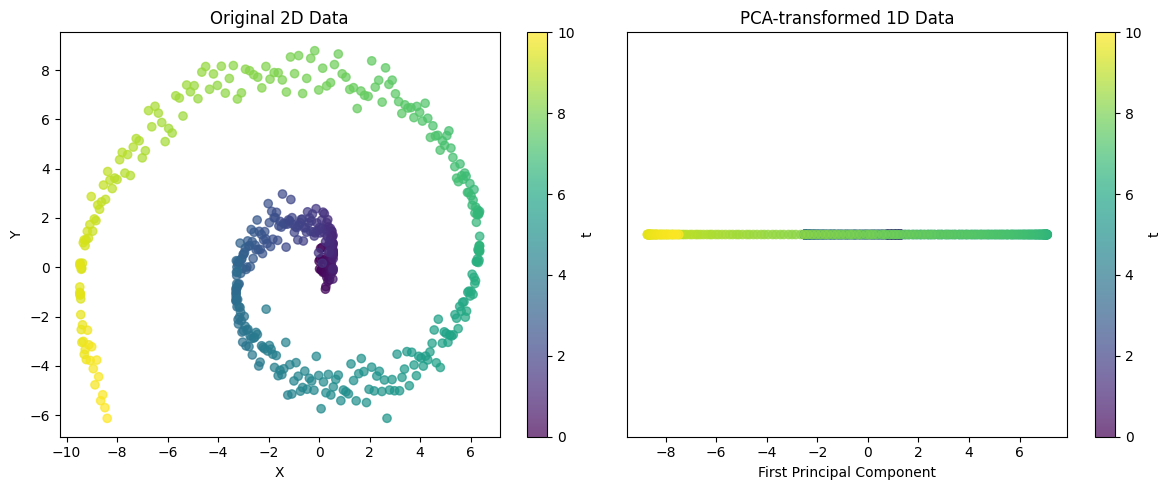

Explained variance ratio: 0.5705


In [ ]:
from dldna.chapter_02.pca import visualize_pca
visualize_pca()

이 예제는 복잡한 2차원 구조를 1차원으로 투영하는 PCA의 능력을 보여줍니다. 나선형 데이터의 경우, 단일 주성분으로는 모든 변동성을 캡처할 수 없지만, 데이터의 주요 트렌드를 포착할 수 있습니다. 설명된 분산 비율을 통해 이 1차원 표현이 원본 데이터의 구조를 얼마나 잘 보존하는지 평가할 수 있습니다

이 기법들은 복잡한 데이터에서 중요한 패턴을 추출하는 강력한 도구입니다.

1.  데이터 전처리: 입력 데이터의 차원 축소
2.  모델 압축: 가중치 행렬의 효율적 근사
3.  특성 추출: 중요 특성 식별 및 선택

SVD와 PCA는 고차원 데이터에서 중요한 패턴을 추출하고, 복잡한 데이터 구조를 단순화하는 강력한 도구입니다.


## 2.2 미적분학과 최적화

### 2.2.1 체인룰

> **도전과제:** 어떻게 복잡하게 중첩된 함수의 미분을 효율적으로 계산할 수 있을까?
>
> **연구자의 고뇌:** 초기 딥러닝 연구자들은 신경망의 가중치를 업데이트하기 위해 역전파 알고리즘을 사용해야 했습니다. 하지만 신경망은 여러 층의 함수가 복잡하게 연결된 구조이기 때문에, 각 가중치에 대한 손실 함수의 미분을 계산하는 것은 매우 어려운 문제였습니다. 특히, 층이 깊어질수록 계산량이 기하급수적으로 증가하여 학습이 비효율적이었습니다.

딥러닝에서 사용하는 가장 중요한 미적분 규칙은 체인룰(chain rule)입니다. 체인룰은 복합 함수의 미분을 구성 함수들의 미분의 곱으로 표현할 수 있게 해주는 강력하고 우아한 규칙입니다. 체인룰을 시각화하면 그 개념을 더 쉽게 이해할 수 있습니다. 예를 들어, $z$가 $x$와 $y$의 함수이고, $x$와 $y$가 각각 $s$와 $t$의 함수라고 가정해 봅시다. 이 관계를 트리 다이어그램으로 나타낼 수 있습니다.

![체인룰](../../../assets/images/02_01.chain_rule.png)

이 다이어그램에서, $z$의 $s$에 대한 편미분 $\frac{\partial z}{\partial s}$는 $z$에서 $s$로 가는 모든 경로를 따라 편미분들의 곱을 더한 것과 같습니다.

$\frac{\partial z}{\partial s} = \frac{\partial z}{\partial x} \frac{\partial x}{\partial s} + \frac{\partial z}{\partial y} \frac{\partial y}{\partial s}$

이 공식에서

*   $\frac{\partial z}{\partial x}$와 $\frac{\partial z}{\partial y}$는 $z$가 $x$와 $y$에 대해 어떻게 변하는지를 나타냅니다.
*   $\frac{\partial x}{\partial s}$와 $\frac{\partial y}{\partial s}$는 $x$와 $y$가 $s$에 대해 어떻게 변하는지를 나타냅니다.


다른 경우로 체인룰을 이용한 전미분 표현을 살펴봅시다. $z$가 상호 독립적인 변수들의 함수일 때를 고려해 봅시다. 이 경우, 체인룰은 전미분의 형태로 간소화됩니다.
예를 들어, $z = f(x, y)$이고 $x = g(s)$, $y = h(t)$일 때, $s$와 $t$가 서로 독립적이라면, $z$의 전미분은 다음과 같이 표현됩니다.

![체인룰](../../../assets/images/02_02_chain_rule.png)

$dz = \frac{\partial z}{\partial x}dx + \frac{\partial z}{\partial y}dy$

여기서 $dx = \frac{\partial x}{\partial s}ds$와 $dy = \frac{\partial y}{\partial t}dt$이므로, 최종적으로 다음과 같은 형태가 됩니다.

$dz = \frac{\partial z}{\partial x}\frac{\partial x}{\partial s}ds + \frac{\partial z}{\partial y}\frac{\partial y}{\partial t}dt$


이 식은 체인룰의 형태와 유사해 보이지만, 실제로는 전미분을 나타냅니다. 여기서 중요한 점은 $s$와 $t$가 독립적이기 때문에, $\frac{\partial x}{\partial t}$와 $\frac{\partial y}{\partial s}$가 0이 된다는 것입니다. 이러한 형태는 전미분입니다. 전미분은 모든 독립 변수의 변화가 함수값에 미치는 총 영향을 나타내며, 각 변수에 대한 편미분의 합으로 표현됩니다.

체인룰의 이런 구조는 복잡한 함수의 미분을 더 간단한 부분들로 분해할 수 있게 해줍니다. 이는 특히 딥러닝에서 중요한데, 신경망은 여러 층의 함수들이 중첩된 구조이기 때문입니다. 트리 다이어그램을 사용하면 더 복잡한 상황에서도 체인룰을 쉽게 적용할 수 있습니다. 종속 변수에서 시작하여 중간 변수들을 거쳐 독립 변수들로 이어지는 모든 경로를 찾고, 각 경로를 따라 편미분들을 곱한 다음, 이 결과들을 모두 더하면 됩니다.

체인룰은 딥러닝에서 역전파 알고리즘의 수학적 기반입니다. 복잡한 신경망 모델의 가중치를 효율적으로 업데이트할 수 있게 해주는 근간이 됩니다.

### 2.2.2 그래디언트와 야코비안

> **도전 과제**: 다양한 형태의 입출력을 갖는 함수에 대한 미분을 어떻게 일반화 할 수 있을까?
>
> **연구자의 고뇌**: 초창기 딥러닝은 주로 스칼라 함수를 다루었지만, 점차 벡터, 행렬 등 다양한 형태의 입출력을 갖는 함수를 다루게 되었습니다. 이러한 함수들의 미분을 통일된 방식으로 표현하고 계산하는 것은 딥러닝 프레임워크 개발에 필수적인 과제였습니다.

딥러닝에서는 다양한 형태의 입력(스칼라, 벡터, 행렬, 텐서)과 출력(스칼라, 벡터, 행렬, 텐서)을 갖는 함수를 다룹니다. 이에 따라 함수의 미분(도함수) 표현도 달라집니다. 핵심은 이러한 다양한 경우의 미분을 일관성 있게 표현하고, 연쇄 법칙(chain rule)을 적용하여 효율적으로 계산하는 것입니다.

#### 핵심 개념

*   **그래디언트(Gradient):** 스칼라 함수를 벡터로 미분할 때 사용하는 표현입니다. 입력 벡터의 각 요소에 대한 함수의 편미분을 요소로 갖는 열벡터입니다. 함수의 가장 가파른 상승 방향을 나타냅니다.

*   **야코비안 행렬(Jacobian Matrix):** 벡터 함수를 벡터로 미분할 때 사용하는 표현입니다. 출력 벡터의 각 요소를 입력 벡터의 각 요소로 편미분한 값들을 요소로 갖는 행렬입니다.

#### 다양한 입출력 형태에 따른 도함수 표현

| 입력 형태          | 출력 형태        | 도함수 표현                                                                  | 차원                 |
| :----------------- | :--------------- | :------------------------------------------------------------------------ | :------------------- |
| 벡터 ($\mathbf{x}$) | 벡터 ($\mathbf{f}$) | 야코비안 행렬 ($\mathbf{J} = \frac{\partial \mathbf{f}}{\partial \mathbf{x}}$)          | $n \times m$          |
| 행렬 ($\mathbf{X}$)  | 벡터 ($\mathbf{f}$) | 3차원 텐서 (일반적으로 잘 다루지 않음)                                                           |  -      |
| 벡터 ($\mathbf{x}$)  | 행렬 ($\mathbf{F}$) | 3차원 텐서 (일반적으로 잘 다루지 않음)                                                          |      -                |
| 스칼라 ($x$)        | 벡터 ($\mathbf{f}$) | 열벡터 ($\frac{\partial \mathbf{f}}{\partial x}$)                             | $n \times 1$          |
| 벡터 ($\mathbf{x}$) | 스칼라 ($f$)     | 그래디언트 ($\nabla f = \frac{\partial f}{\partial \mathbf{x}}$)          | $m \times 1$ (열벡터) |
| 행렬 ($\mathbf{X}$)  | 스칼라 ($f$)     | 행렬 ($\frac{\partial f}{\partial \mathbf{X}}$)                                   | $m \times n$          |

**참고:**

*   $m$: 입력 벡터/행렬의 차원, $n$: 출력 벡터/행렬의 차원, $p, q$: 행렬의 행/열 개수

*   행렬 입력, 벡터/행렬 출력의 경우, 도함수는 3차원 텐서가 됩니다. 딥러닝 프레임워크는 내부적으로 이러한 고차원 텐서 연산을 효율적으로 처리하지만, 일반적으로는 벡터/행렬 입출력에 대한 야코비안/그래디언트 계산이 주를 이룹니다.

#### 딥러닝에서의 활용

*   **역전파 알고리즘:** 야코비안 행렬과 그래디언트는 딥러닝에서 역전파 알고리즘을 구현할 때 핵심적인 역할을 합니다. 신경망의 각 층을 통과하며 연쇄 법칙을 적용하여 가중치에 대한 손실 함수의 그래디언트를 계산하고, 이를 통해 가중치를 업데이트합니다.
*   **자동 미분:** 현대 딥러닝 프레임워크(TensorFlow, PyTorch 등)는 자동 미분(Automatic Differentiation) 기능을 제공하여 이러한 복잡한 미분 계산을 자동으로 처리합니다. 사용자는 복잡한 미분 공식을 직접 구현할 필요 없이, 모델의 구조와 손실 함수만 정의하면 됩니다.

이처럼, 그래디언트와 야코비안 행렬의 개념은 딥러닝에서 다양한 형태의 함수에 대한 미분을 일반화하고, 역전파를 통해 효율적으로 모델을 학습시키는 데 필수적인 도구입니다.


::: {.callout-note collapse="true" title="클릭하여 내용 보기 (딥다이브: 헤시안 행렬)"}

## 헤시안 행렬 (Hessian Matrix)

### 1. 헤시안 행렬의 정의와 의미

- **정의:** 헤시안 행렬은 스칼라 함수(scalar-valued function)의 이계도 함수(second-order partial derivatives)를 행렬 형태로 표현한 것입니다. 즉, 함수 $f(x_1, x_2, ..., x_n)$가 주어졌을 때, 헤시안 행렬 $H$는 다음과 같이 정의됩니다.

  $$
  H = \begin{bmatrix}
  \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
  \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
  \vdots & \vdots & \ddots & \vdots \\
  \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
  \end{bmatrix}
  $$

  - 각 원소는 함수의 각 변수에 대한 두 번 미분한 값을 나타냅니다.
  - **대칭 행렬(Symmetric Matrix):** 연속인 이계도 함수를 가지는 경우, 편미분의 순서를 바꿔도 결과가 같으므로(Schwarz's theorem), 헤시안 행렬은 대칭 행렬이 됩니다. ($\frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{\partial^2 f}{\partial x_j \partial x_i}$)

- **의미:**
    - **곡률(Curvature):** 헤시안 행렬은 함수의 국소적인 곡률 정보를 담고 있습니다. 함수의 그래프가 특정 지점에서 얼마나 굽어있는지를 나타냅니다.
    - **변화율의 변화율:** 일계도 함수(그레디언트, Gradient)가 함수의 변화율을 나타낸다면, 헤시안 행렬은 그 변화율이 얼마나 빠르게 변하는지를 나타냅니다.

### 2. 헤시안 행렬과 함수의 극값 (Critical Point) 판별

- **임계점(Critical Point):** 함수의 기울기(gradient)가 0이 되는 지점입니다. 즉, 모든 변수에 대한 일계 편미분 값이 0인 지점입니다. ($\nabla f = 0$)
- **극값 판별:**
    - 헤시안 행렬은 임계점에서 함수가 극대값(local maximum), 극소값(local minimum), 또는 안장점(saddle point)을 갖는지 판별하는 데 사용됩니다.
    - **극소값(Local Minimum):** 헤시안 행렬이 **양의 정부호(positive definite)** 행렬이면 해당 임계점은 극소값입니다. (모든 고유값(eigenvalue)이 양수)
    - **극대값(Local Maximum):** 헤시안 행렬이 **음의 정부호(negative definite)** 행렬이면 해당 임계점은 극대값입니다. (모든 고유값이 음수)
    - **안장점(Saddle Point):** 헤시안 행렬이 **부정부호(indefinite)** 행렬이면 해당 임계점은 안장점입니다. (양수와 음수 고유값을 모두 가짐)
    - **Semi-definite:** 헤시안이 positive/negative semi-definite이면, 추가적인 정보 없이는 극점의 유형을 판별할 수 없습니다. (고유값이 0을 포함)

### 3. 딥러닝에서 헤시안 행렬의 활용

- **뉴턴 방법 (Newton's Method):**
    - 함수의 극값을 찾는 최적화 알고리즘 중 하나입니다.
    - 경사 하강법(Gradient Descent)이 일계 미분(그레디언트)을 사용하는 반면, 뉴턴 방법은 이계 미분(헤시안)을 사용하여 더 빠르게 수렴할 수 있습니다.
    - 업데이트 규칙:  $x_{k+1} = x_k - H^{-1}(x_k) \nabla f(x_k)$  (H는 헤시안 행렬)

- **Curvature Matrix:**
  - 헤시안 행렬은 손실 함수(loss function)의 곡률을 나타내는 curvature matrix로 사용될 수 있습니다.
  - 곡률 정보를 활용하여 학습률(learning rate)을 조절하거나, 최적화 알고리즘의 성능을 개선하는 데 활용됩니다. (e.g., Natural Gradient Descent)

:::

### 2.2.3 체인룰과 신경망의 역전파

신경망 학습의 핵심은 역전파(Backpropagation) 알고리즘입니다. 역전파는 출력층에서 발생한 오차를 입력층 방향으로 전파하면서 각 층의 가중치와 편향을 업데이트하는 효율적인 방법입니다. 이 과정에서 체인룰(Chain Rule)은 복잡한 합성 함수의 미분을 간단한 미분들의 곱으로 표현하여 계산을 가능하게 합니다.

#### 신경망에서의 체인룰 적용

신경망은 여러 층의 함수들이 합성된 형태입니다.  예를 들어, 2층 신경망은 다음과 같이 표현될 수 있습니다.

$\mathbf{z} = f_1(\mathbf{x}; \mathbf{W_1}, \mathbf{b_1})$
$\mathbf{y} = f_2(\mathbf{z}; \mathbf{W_2}, \mathbf{b_2})$

여기서 $\mathbf{x}$는 입력, $\mathbf{z}$는 첫 번째 층의 출력(두 번째 층의 입력), $\mathbf{y}$는 최종 출력, $\mathbf{W_1}$, $\mathbf{b_1}$은 첫 번째 층의 가중치와 편향, $\mathbf{W_2}$, $\mathbf{b_2}$는 두 번째 층의 가중치와 편향입니다.

역전파 과정에서 우리는 손실 함수 $E$의 각 파라미터에 대한 그래디언트 ($\frac{\partial E}{\partial \mathbf{W_1}}$, $\frac{\partial E}{\partial \mathbf{b_1}}$, $\frac{\partial E}{\partial \mathbf{W_2}}$, $\frac{\partial E}{\partial \mathbf{b_2}}$)를 계산해야 합니다.  이때 체인룰을 적용하면 다음과 같이 계산할 수 있습니다.

$\frac{\partial E}{\partial \mathbf{W_2}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{W_2}}$
$\frac{\partial E}{\partial \mathbf{b_2}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{b_2}}$
$\frac{\partial E}{\partial \mathbf{W_1}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial \mathbf{W_1}}$
$\frac{\partial E}{\partial \mathbf{b_1}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{z}} \frac{\partial \mathbf{z}}{\partial \mathbf{b_1}}$

이처럼 체인룰을 이용하면, 복잡한 신경망의 각 파라미터에 대한 그래디언트를 연쇄적인 미분의 곱으로 분해하여 효율적으로 계산할 수 있습니다. 2.2.4의 이론 딥다이브는 이 과정을 자세히 설명합니다.

#### 그래디언트와 방향 도함수

*   **그래디언트(Gradient):** 다변수 함수의 각 변수에 대한 편미분(partial derivative)을 모아 놓은 벡터입니다. 함수의 가장 가파른 상승 방향을 나타냅니다.
*   **방향 도함수(Directional Derivative):** 특정 방향으로의 함수의 변화율을 나타냅니다. 그래디언트와 방향 벡터의 내적(dot product)으로 계산할 수 있습니다.

#### 그래디언트 표현의 주의점

*   **열벡터 vs. 행벡터:** 일반적으로 벡터는 열벡터로 표현하는 것이 관례이지만, 딥러닝에서는 문맥에 따라 행벡터로 표현하는 경우도 있습니다. 일관성을 유지하는 것이 중요합니다. (이 책에서는 분자 표기법을 사용합니다.)
*   **야코비안 행렬(Jacobian Matrix):** 여러 개의 입력 변수와 여러 개의 출력 변수를 갖는 함수(벡터 함수)의 경우, 모든 편미분 값을 포함하는 행렬입니다. 딥러닝에서 역전파 계산에 사용됩니다.

이러한 개념들을 바탕으로, 다음 절에서는 구체적인 예시와 함께 역전파 과정에서의 그래디언트 계산 방법을 자세히 살펴보겠습니다.

### 2.2.4 역전파를 위한 그래디언트 계산

역전파의 핵심은 손실 함수(Loss Function)의 그래디언트를 계산하여 가중치를 업데이트하는 것입니다. 간단한 선형 변환($\mathbf{y} = \mathbf{xW} + \mathbf{b}$)을 예로 들어 역전파 과정을 살펴보겠습니다.

#### 1. 역전파의 핵심 아이디어

역전파는 출력층에서 계산된 오차를 입력층 방향으로 전파하면서, 각 가중치가 오차에 기여한 만큼 가중치를 업데이트하는 알고리즘입니다. 이 과정에서 각 가중치에 대한 손실 함수의 그래디언트를 계산하는 것이 핵심입니다.

#### 2. 손실 함수의 그래디언트

평균 제곱 오차(Mean Squared Error, MSE)를 손실 함수로 사용하면, 출력 $\mathbf{y}$에 대한 손실 함수 $E$의 그래디언트는 다음과 같습니다.

$E = \frac{1}{M} \sum_{i=1}^{M} (y_i - \hat{y}_i)^2$

$\frac{\partial E}{\partial \mathbf{y}} = \frac{2}{M}(\mathbf{y} - \hat{\mathbf{y}})$

여기서 $y_i$는 실제 값, $\hat{y}_i$는 모델의 예측값, $M$은 데이터의 개수입니다.

#### 3. 가중치에 대한 그래디언트

체인룰을 적용하여 가중치 $\mathbf{W}$에 대한 손실 함수 $E$의 그래디언트를 계산할 수 있습니다.

$\frac{\partial E}{\partial \mathbf{W}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{W}}$

$\mathbf{y} = \mathbf{xW} + \mathbf{b}$ 이므로, $\frac{\partial \mathbf{y}}{\partial \mathbf{W}} = \mathbf{x}^T$ 입니다.

최종적으로 가중치에 대한 그래디언트는 다음과 같이 표현됩니다.

$\frac{\partial E}{\partial \mathbf{W}} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$

#### 4. 입력에 대한 그래디언트

입력 $\mathbf{x}$에 대한 손실 함수 $E$의 그래디언트는 이전 층으로 오차를 전파하는 데 사용됩니다.

$\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{x}}$

$\mathbf{y} = \mathbf{xW} + \mathbf{b}$ 이므로, $\frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \mathbf{W}^T$ 입니다.

따라서, 입력에 대한 그래디언트는 다음과 같습니다.

$\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \mathbf{W}^T$

#### 5. 정리

역전파는 다음과 같은 핵심 단계를 통해 이루어집니다.

1.  **순전파(Forward Propagation):** 입력 데이터 $\mathbf{x}$를 신경망에 통과시켜 예측값 $\hat{\mathbf{y}}$를 계산합니다.
2.  **손실 함수 계산:** 예측값 $\hat{\mathbf{y}}$와 실제 값 $\mathbf{y}$를 비교하여 손실 $E$를 계산합니다.
3.  **역전파(Backward Propagation):**
    *   출력층에서 손실 함수의 그래디언트 $\frac{\partial E}{\partial \mathbf{y}}$를 계산합니다.
    *   체인룰을 이용하여 가중치에 대한 그래디언트 $\frac{\partial E}{\partial \mathbf{W}} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$를 계산합니다.
    *   입력에 대한 그래디언트 $\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \mathbf{W}^T$를 계산하여 이전 층으로 오차를 전파합니다.
4.  **가중치 업데이트:** 계산된 그래디언트를 사용하여 경사 하강법 등의 최적화 알고리즘으로 가중치를 업데이트합니다.

역전파 알고리즘은 딥러닝 모델 학습의 핵심이며, 이를 통해 복잡한 비선형 함수를 효과적으로 근사할 수 있습니다.


::: {.callout-note collapse="true" title="클릭하여 내용 보기(딥다이브 : 역전파를 위한 그래디언트 계산)"}

역전파의 핵심은 손실 함수(Loss Function)의 그래디언트를 계산하여 가중치를 업데이트하는 것입니다. 간단한 선형 변환($\mathbf{y} = \mathbf{xW} + \mathbf{b}$)을 예로 들어 역전파 과정을 살펴보겠습니다.  여기서는 계산 과정을 최대한 상세하게 풀어서 설명합니다.

#### 손실 함수의 그래디언트

신경망 학습의 목표는 손실 함수 $E$를 최소화하는 것입니다. 평균 제곱 오차(MSE)를 손실 함수로 사용하는 경우는 다음과 같습니다.

$E = f(\mathbf{y}) = \frac{1}{M} \sum_{i=1}^{M} (y_i - \hat{y}_i)^2$

여기서 $y_i$는 실제 값, $\hat{y}_i$는 예측값, $M$은 데이터의 개수(또는 출력 벡터의 차원)입니다.

$E$의 $\mathbf{y}$에 대한 도함수(derivative)는 다음과 같습니다.

$\frac{\partial E}{\partial \mathbf{y}} = \frac{2}{M} (\mathbf{y} - \hat{\mathbf{y}})$

여기서 $\mathbf{y}$는 신경망의 출력 벡터, $\hat{\mathbf{y}}$는 실제 값(타겟) 벡터입니다. $y_i$는 상수(타겟의 각 요소)이므로, $\mathbf{y}$에 대한 편미분만 남게 됩니다.

**주의:** 1장의 예제 코드에서는 $-\frac{2}{M}$ 항을 사용했는데, 이는 손실 함수 정의에 음수 부호(-)가 포함되어 있었기 때문입니다.  여기서는 일반적인 MSE 정의를 사용하므로 양수 $\frac{2}{M}$을 사용합니다.  실제 학습에서는 학습률(learning rate)을 곱하므로 이 상수의 절대적인 크기는 중요하지 않습니다.

#### 가중치에 대한 손실 함수의 그래디언트

이제, 가중치 $\mathbf{W}$에 대한 손실 함수 $E$의 그래디언트를 계산해 보겠습니다.  $E = f(\mathbf{y})$이고 $\mathbf{y} = \mathbf{xW} + \mathbf{b}$ 입니다.  $\mathbf{x}$는 입력 벡터, $\mathbf{W}$는 가중치 행렬, $\mathbf{b}$는 편향 벡터입니다.

**계산 그래프:**

역전파 과정을 시각적으로 표현하기 위해 계산 그래프를 사용할 수 있습니다. (계산 그래프 그림 삽입)

$E$는 스칼라 값이고, 각 $w_{ij}$ (가중치 행렬 $\mathbf{W}$의 각 요소)에 대해 $E$의 편미분을 구해야 합니다. $\mathbf{W}$는 (입력 차원) x (출력 차원) 크기의 행렬입니다.  예를 들어, 입력이 3차원($x_1, x_2, x_3$), 출력이 2차원($y_1, y_2$)이라면, $\mathbf{W}$는 3x2 행렬이 됩니다.

$\frac{\partial E}{\partial \mathbf{W}} = \begin{bmatrix}
\frac{\partial E}{\partial w_{11}} & \frac{\partial E}{\partial w_{12}} \\
\frac{\partial E}{\partial w_{21}} & \frac{\partial E}{\partial w_{22}} \\
\frac{\partial E}{\partial w_{31}} & \frac{\partial E}{\partial w_{32}}
\end{bmatrix}$

$E$의 $\mathbf{y}$에 대한 도함수는 $\frac{\partial E}{\partial \mathbf{y}} = \begin{bmatrix} \frac{\partial E}{\partial y_1} & \frac{\partial E}{\partial y_2} \end{bmatrix}$ 와 같이 행 벡터로 표현될 수 있습니다. (분자 표기법 사용). 엄밀하게는 그래디언트는 열 벡터로 표현해야 하지만, 여기서는 계산의 편의를 위해 행 벡터를 사용합니다.

체인룰에 의해,

$\frac{\partial E}{\partial \mathbf{W}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{W}}$

$\frac{\partial E}{\partial w_{ij}} = \sum_k \frac{\partial E}{\partial y_k} \frac{\partial y_k}{\partial w_{ij}}$ (여기서 $k$는 출력 벡터 $\mathbf{y}$의 인덱스)

위 식을 풀어서 쓰면,

$\frac{\partial E}{\partial \mathbf{W}} = \frac{\partial E}{\partial y_1} \frac{\partial y_1}{\partial \mathbf{W}} + \frac{\partial E}{\partial y_2} \frac{\partial y_2}{\partial \mathbf{W}}$

이제 $\frac{\partial y_k}{\partial w_{ij}}$ 를 계산해야 합니다.  $\mathbf{y} = \mathbf{xW} + \mathbf{b}$ 이므로,

$y_1 = x_1w_{11} + x_2w_{21} + x_3w_{31} + b_1$
$y_2 = x_1w_{12} + x_2w_{22} + x_3w_{32} + b_2$

$\frac{\partial y_1}{\partial w_{ij}} = \begin{bmatrix}
\frac{\partial y_1}{\partial w_{11}} & \frac{\partial y_1}{\partial w_{12}} \\
\frac{\partial y_1}{\partial w_{21}} & \frac{\partial y_1}{\partial w_{22}} \\
\frac{\partial y_1}{\partial w_{31}} & \frac{\partial y_1}{\partial w_{32}}
\end{bmatrix} =
\begin{bmatrix}
x_1 & 0 \\
x_2 & 0 \\
x_3 & 0
\end{bmatrix}$

$\frac{\partial y_2}{\partial w_{ij}} = \begin{bmatrix}
0 & x_1 \\
0 & x_2 \\
0 & x_3
\end{bmatrix}$

따라서,

$\frac{\partial E}{\partial \mathbf{W}} = \frac{\partial E}{\partial y_1} \begin{bmatrix}
x_1 & 0 \\
x_2 & 0 \\
x_3 & 0
\end{bmatrix} + \frac{\partial E}{\partial y_2} \begin{bmatrix}
0 & x_1 \\
0 & x_2 \\
0 & x_3
\end{bmatrix} = \begin{bmatrix}
\frac{\partial E}{\partial y_1}x_1 & \frac{\partial E}{\partial y_2}x_1 \\
\frac{\partial E}{\partial y_1}x_2 & \frac{\partial E}{\partial y_2}x_2 \\
\frac{\partial E}{\partial y_1}x_3 & \frac{\partial E}{\partial y_2}x_3
\end{bmatrix} = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} \begin{bmatrix} \frac{\partial E}{\partial y_1} & \frac{\partial E}{\partial y_2} \end{bmatrix} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$

**일반화:**

입력이 $1 \times m$ 행 벡터 $\mathbf{x}$, 출력이 $1 \times n$ 행 벡터 $\mathbf{y}$인 경우, 가중치 $\mathbf{W}$는 $m \times n$ 행렬이 됩니다.  이때,

$\frac{\partial E}{\partial \mathbf{W}} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$

#### 입력에 대한 손실 함수의 그래디언트

입력 $\mathbf{x}$에 대한 손실 함수 $E$의 그래디언트도 마찬가지로 체인룰을 사용하여 계산할 수 있습니다.

$\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{x}}$

$\mathbf{y} = \mathbf{xW} + \mathbf{b}$ 이므로, $\frac{\partial \mathbf{y}}{\partial \mathbf{x}} = \mathbf{W}^T$ 입니다.

따라서,

$\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \mathbf{W}^T$

#### 편향에 대한 그래디언트

편향 $\mathbf{b}$에 대한 손실 함수의 그래디언트는 다음과 같습니다.

 $\frac{\partial E}{\partial \mathbf{b}} = \frac{\partial E}{\partial \mathbf{y}} \frac{\partial \mathbf{y}}{\partial \mathbf{b}}$

$\mathbf{y} = \mathbf{xW} + \mathbf{b}$ 이므로, $\frac{\partial \mathbf{y}}{\partial \mathbf{b}} = \begin{bmatrix} 1 & 1 & \dots & 1\end{bmatrix}$ (1로만 이루어진 $1 \times n$ 행벡터)

$\frac{\partial E}{\partial \mathbf{b}} = \frac{\partial E}{\partial \mathbf{y}}$

#### 정리 및 추가 설명
1. **가중치에 대한 그래디언트:** $\frac{\partial E}{\partial \mathbf{W}} = \mathbf{x}^T \frac{\partial E}{\partial \mathbf{y}}$
   * 입력 벡터 $\mathbf{x}$의 전치(transpose)와 출력에 대한 손실 함수의 그래디언트($\frac{\partial E}{\partial \mathbf{y}}$, 여기서는 행 벡터로 표현)의 행렬 곱으로 계산됩니다.

2. **입력에 대한 그래디언트:** $\frac{\partial E}{\partial \mathbf{x}} = \frac{\partial E}{\partial \mathbf{y}} \mathbf{W}^T$
    * 출력에 대한 손실 함수의 그래디언트($\frac{\partial E}{\partial \mathbf{y}}$)와 가중치 행렬 $\mathbf{W}$의 전치(transpose)의 행렬 곱으로 계산됩니다. 이 결과는 이전 층(layer)으로 역전파되어 해당 층의 가중치 업데이트에 사용됩니다.

3. **편향에 대한 그래디언트**:  $\frac{\partial E}{\partial \mathbf{b}} = \frac{\partial E}{\partial \mathbf{y}}$
  * 출력에 대한 손실 함수의 그래디언트와 같다.

4. **그래디언트의 활용:** 이렇게 계산된 그래디언트들은 경사 하강법(Gradient Descent)과 같은 최적화 알고리즘에서 가중치와 편향을 업데이트하는 데 사용됩니다.  각 파라미터는 그래디언트의 반대 방향으로 업데이트되어 손실 함수를 최소화합니다.

5. **표기법:** 위 설명에서는 분자 표기법(numerator layout)을 사용하여 그래디언트를 계산했습니다. 분모 표기법(denominator layout)을 사용할 수도 있지만, 결과적으로 동일한 업데이트 규칙을 얻게 됩니다. 중요한 것은 일관된 표기법을 사용하는 것입니다. 이 책에서는 분자 표기법을 사용합니다.

이러한 수학적 과정을 통해 딥러닝 모델은 입력 데이터로부터 출력 데이터로의 복잡한 비선형 변환을 학습할 수 있습니다.

:::


## 2.3 확률과 통계

딥러닝은 데이터의 불확실성을 다루는 확률과 통계 이론에 깊이 뿌리를 두고 있습니다. 이 장에서는 확률 분포, 기댓값, 베이즈 정리, 최대 우도 추정 등 핵심 개념을 살펴보겠습니다. 이러한 개념들은 모델의 학습과 추론 과정을 이해하는 데 필수적입니다.

### 2.3.1 확률 분포와 기댓값

> **도전 과제**: 실제 데이터의 불확실성을 어떻게 수학적으로 모델링 할 수 있을까?
>
> **연구자의 고뇌**: 초창기 머신러닝 연구자들은 현실 세계의 데이터가 결정론적인(deterministic) 규칙으로 설명될 수 없다는 것을 인지했습니다. 데이터에는 측정 오차, 잡음, 예측 불가능한 변동성이 존재하기 때문입니다. 이러한 불확실성을 정량화하고 모델에 반영하기 위한 수학적 도구가 필요했습니다.

확률 분포는 가능한 모든 결과와 그 발생 확률을 나타냅니다. 이산 확률 분포와 연속 확률 분포로 나눌 수 있습니다.

#### 이산 확률 분포

이산 확률 분포는 확률 변수가 취할 수 있는 값이 유한하거나 셀 수 있는 경우를 다룹니다. 각 가능한 결과에 대해 명확한 확률을 할당할 수 있다는 점이 특징입니다.

수학적으로, 이산 확률 분포는 확률 질량 함수(PMF)로 표현됩니다.

$$P(X = x) = p(x)$$

여기서 p(x)는 X가 값 x를 가질 확률입니다. 주요 성질은 다음과 같습니다.

1. 모든 x에 대해 $0 ≤ p(x) ≤ 1$
2. $\sum_{x} p(x) = 1$

대표적인 예로는 베르누이 분포, 이항 분포, 포아송 분포가 있습니다.

주사위 던지기의 확률 질량 함수는 다음과 같습니다.

$$P(X = x) = \begin{cases} 
\frac{1}{6} & \text{if } x \in \{1, 2, 3, 4, 5, 6\} \
0 & \text{otherwise}
\end{cases}$$

이산 확률 분포는 머신러닝과 딥러닝에서 분류 문제, 강화학습, 자연어 처리 등 다양한 분야에서 활용됩니다. 다음은 주사위 던지기를 시뮤레이션 한 결과입니다.

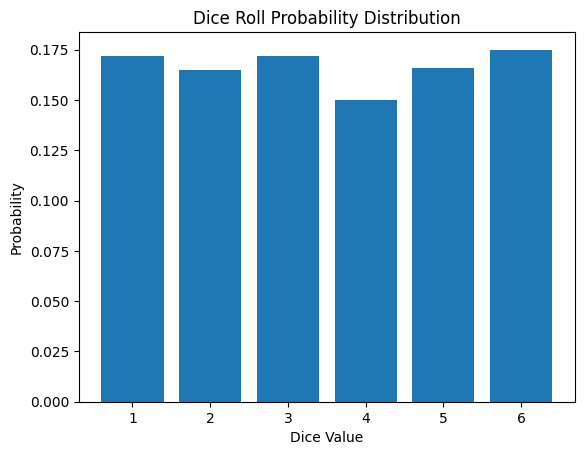

In [ ]:
from dldna.chapter_02.statistics import simulate_dice_roll

simulate_dice_roll()


#### 연속 확률 분포

연속 확률 분포는 확률 변수가 연속적인 값을 취할 수 있는 경우를 다룹니다. 이산 확률 분포와 달리, 특정 점에서의 확률은 0이며, 구간에 대한 확률을 다룹니다. 수학적으로, 연속 확률 분포는 확률 밀도 함수(Probability Density Function, PDF)로 표현됩니다.

$$f(x) = \lim_{\Delta x \to 0} \frac{P(x < X \leq x + \Delta x)}{\Delta x}$$

여기서 f(x)는 x 근처에서의 확률 밀도를 나타냅니다. 주요 성질은 다음과 같습니다.

1. 모든 x에 대해 f(x) ≥ 0
2. $\int_{-\infty}^{\infty} f(x) dx = 1$

대표적인 예로는 정규 분포, 지수 분포, 감마 분포가 있습니다.

정규 분포의 확률 밀도 함수는 다음과 같습니다.

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

여기서 μ는 평균, σ는 표준편차입니다.

연속 확률 분포는 회귀 문제, 신호 처리, 시계열 분석 등 다양한 머신러닝과 딥러닝 응용 분야에서 중요하게 사용됩니다.

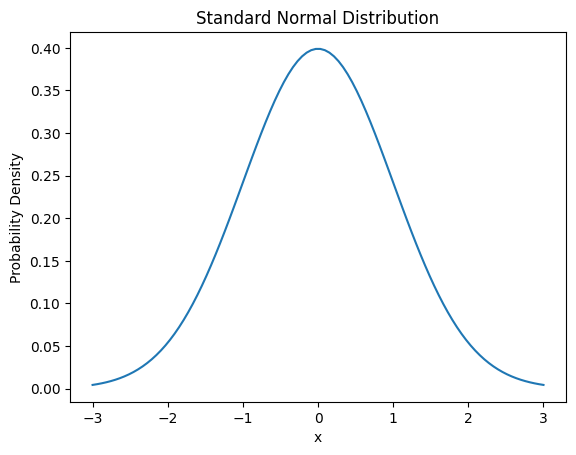

In [ ]:
from dldna.chapter_02.statistics import plot_normal_distribution

plot_normal_distribution()


#### 기댓값

기댓값은 확률 분포의 중심 경향을 나타내는 중요한 개념입니다. 이는 확률 변수의 가능한 모든 값에 대한 가중 평균으로 해석할 수 있습니다. 이산 확률 분포의 경우, 기댓값은 다음과 같이 계산됩니다.

$$E[X] = \sum_{i} x_i P(X = x_i)$$

여기서 $x_i$는 확률 변수 X의 가능한 값이고, $P(X = x_i)$는 그 값의 확률입니다. 연속 확률 분포의 경우, 기댓값은 적분을 통해 계산됩니다.

$$E[X] = \int_{-\infty}^{\infty} x f(x) dx$$

여기서 $f(x)$는 확률 밀도 함수입니다. 기댓값은 다음과 같은 중요한 성질을 가집니다.

1. 선형성: $E[aX + b] = aE[X] + b$
2. 독립 확률 변수의 곱의 기댓값: $E[XY] = E[X]E[Y]$ (X와 Y가 독립일 때)

딥러닝에서 기댓값은 손실 함수의 최소화나 모델 파라미터의 추정에 핵심적으로 사용됩니다. 예를 들어, 평균 제곱 오차(MSE)는 다음과 같이 정의됩니다.

$$MSE = E[(Y - \hat{Y})^2]$$

여기서 $Y$는 실제값, $\hat{Y}$는 예측값입니다. 

기댓값의 개념은 확률적 경사 하강법(Stochastic Gradient Descent)과 같은 최적화 알고리즘의 이론적 기반을 제공하며, 강화학습에서의 가치 함수 추정에도 중요하게 활용됩니다.

In [ ]:
from dldna.chapter_02.statistics import calculate_dice_expected_value

calculate_dice_expected_value()

Expected value of dice roll: 3.5



이러한 확률과 통계의 기본 개념들은 딥러닝 모델의 설계, 학습, 평가 과정에서 핵심적인 역할을 합니다. 다음 섹션에서는 이를 바탕으로 베이즈 정리와 최대 우도 추정에 대해 알아보겠습니다.

### 2.3.2 베이즈 정리와 최대 우도 추정

> **도전과제:** 어떻게 제한된 데이터를 가지고 모델의 파라미터를 가장 잘 추정할 수 있을까?
>
> **연구자의 고뇌:**  초기 통계학자들과 머신러닝 연구자들은 종종 제한된 데이터만을 가지고 모델을 만들어야 하는 상황에 직면했습니다.  데이터가 충분하지 않은 상황에서 모델의 파라미터를 정확하게 추정하는 것은 매우 어려운 문제였습니다.  단순히 데이터에만 의존하는 것이 아니라, 사전 지식이나 믿음을 활용하여 추정의 정확도를 높이는 방법이 필요했습니다.

베이즈 정리와 최대 우도 추정은 확률론과 통계학의 핵심 개념으로, 딥러닝에서 모델 학습과 추론에 광범위하게 적용됩니다.

#### 베이즈 정리

베이즈 정리는 조건부 확률을 계산하는 방법을 제공합니다. 이는 새로운 증거가 주어졌을 때 가설의 확률을 갱신하는 데 사용됩니다. 베이즈 정리의 수학적 표현은 다음과 같습니다.

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

여기서:
- $P(A|B)$는 B가 주어졌을 때 A의 확률 (사후 확률)
- $P(B|A)$는 A가 주어졌을 때 B의 확률 (우도)
- $P(A)$는 A의 확률 (사전 확률)
- $P(B)$는 B의 확률 (증거)

베이즈 정리는 머신러닝에서 다음과 같이 활용됩니다.

1. 분류 문제: 나이브 베이즈 분류기에서 특정 클래스에 속할 확률을 계산합니다.
2. 파라미터 추정: 모델 파라미터의 사후 분포를 계산하는 데 사용됩니다.
3. 의사결정 이론: 불확실성 하에서의 최적 결정을 내리는 데 활용됩니다.

#### 최대 우도 추정

최대 우도 추정(Maximum Likelihood Estimation, MLE)은 주어진 데이터를 가장 잘 설명하는 모델 파라미터를 찾는 방법입니다. 딥러닝의 맥락에서, 이는 신경망이 관측된 데이터를 가장 잘 설명할 수 있는 가중치와 편향을 찾는 과정을 의미합니다. 즉, 최대 우도 추정은 모델이 훈련 데이터를 생성할 확률을 최대화하는 파라미터를 찾는 것으로, 이는 곧 모델의 학습 과정과 직접적으로 연결됩니다.
수학적으로, 데이터 $X = (x_1, ..., x_n)$가 주어졌을 때, 파라미터 $\theta$에 대한 우도 함수는 다음과 같이 정의됩니다.

$$L(\theta|X) = P(X|\theta) = \prod_{i=1}^n P(x_i|\theta)$$

최대 우도 추정치 $\hat{\theta}_{MLE}$는 다음과 같이 구합니다.

$$\hat{\theta}_{MLE} = \operatorname{argmax}_{\theta} L(\theta|X)$$

실제로는 로그 우도를 최대화하는 것이 계산상 더 편리합니다. 

$$\hat{\theta}_{MLE} = \operatorname{argmax}_{\theta} \log L(\theta|X) = \operatorname{argmax}_{\theta} \sum_{i=1}^n \log P(x_i|\theta)$$

로그 우도를 사용하는 데에는 여러 가지 중요한 수학적 장점이 있습니다.

1. 곱셈을 덧셈으로 변환: 로그 함수의 특성상 $\log(ab) = \log(a) + \log(b)$이므로, 확률의 곱을 로그 확률의 합으로 바꿀 수 있습니다. 이는 계산을 단순화하고 수치적 안정성을 높입니다.
2. 수치적 안정성 향상: 매우 작은 확률값들을 다룰 때, 곱셈은 언더플로우를 일으킬 수 있습니다. 로그를 사용하면 이러한 문제를 피할 수 있습니다.
3. 미분 간소화: 최적화 과정에서 미분을 계산할 때, 로그 함수를 사용하면 계산이 더 간단해집니다. 특히 지수 분포의 경우 이점이 두드러집니다.
4. 단조 증가 함수: 로그 함수는 단조 증가 함수이므로, 우도를 최대화하는 것과 로그 우도를 최대화하는 것은 동일한 결과를 얻습니다.

이러한 이유로, 딥러닝을 포함한 많은 기계학습 알고리즘에서는 로그 우도를 사용하여 최적화를 수행합니다.

최대 우도 추정은 딥러닝에서 다음과 같이 활용됩니다.

1. 모델 학습: 신경망의 가중치를 학습할 때 손실 함수를 최소화하는 과정은 사실상 최대 우도 추정과 동일합니다.
2. 확률 모델링: 생성 모델에서 데이터의 분포를 추정하는 데 사용됩니다.
3. 하이퍼파라미터 튜닝: 모델의 하이퍼파라미터를 선택하는 데 활용될 수 있습니다.

베이즈 정리와 최대 우도 추정은 서로 밀접한 관련이 있습니다. 베이즈 추정에서 사전 확률이 균일 분포일 경우, 최대 사후 확률(MAP) 추정은 최대 우도 추정과 동일해집니다. 수학적으로 표현하면, $P(\theta|X) \propto P(X|\theta)P(\theta)$에서 $P(\theta)$가 상수일 때, $\operatorname{argmax}_{\theta} P(\theta|X) = \operatorname{argmax}_{\theta} P(X|\theta)P(\theta)$가 됩니다. 이는 사전 확률이 파라미터에 대한 추가적인 정보를 제공하지 않을 때, 데이터만을 기반으로 한 추정(MLE)이 베이즈 추정(MAP)과 일치함을 의미합니다.

이러한 개념들은 딥러닝 모델의 학습과 추론 과정을 이해하고 최적화하는 데 필수적입니다. 다음 섹션에서는 정보 이론의 기초에 대해 알아보겠습니다.


::: {.callout-note collapse="true" title="딥다이브: 베이즈 정리의 심층 분석"}

## 베이즈 정리 (Bayes' Theorem) - 심층 분석

### 1. 베이즈 정리의 엄밀한 유도 및 확률 공간

- **확률 공간 (Probability Space):** 베이즈 정리는 확률 공간 $(\Omega, \mathcal{F}, P)$ 위에서 정의됩니다.
    - $\Omega$: 표본 공간 (Sample Space, 모든 가능한 결과들의 집합)
    - $\mathcal{F}$: 사건 공간 (Event Space, 표본 공간의 부분집합들의 집합, $\sigma$-algebra)
    - $P$: 확률 측도 (Probability Measure, 사건 공간의 각 사건에 확률을 할당하는 함수)

- **조건부 확률의 엄밀한 정의:**
    - 사건 $B \in \mathcal{F}$에 대해 $P(B) > 0$일 때, 사건 $A \in \mathcal{F}$의 조건부 확률 $P(A|B)$는 다음과 같이 정의됩니다.
      $P(A|B) = \frac{P(A \cap B)}{P(B)}$

- **결합 확률:**
    - 두 사건 $A, B \in \mathcal{F}$의 결합 확률 $P(A \cap B)$는 두 사건이 동시에 일어날 확률을 나타냅니다.
    - 조건부 확률의 정의를 이용하여 다음과 같이 표현할 수 있습니다.
        - $P(A \cap B) = P(A|B)P(B)$
        - $P(A \cap B) = P(B|A)P(A)$

- **베이즈 정리 유도:**
   1. $P(A|B)P(B) = P(B|A)P(A)$ (결합 확률의 두 표현)
   2. $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$ (양변을 $P(B)$로 나눔, $P(B) > 0$)

### 2. 베이즈 정리 각 항의 심층적 의미와 통계적 해석

- **$P(A|B)$: 사후 확률 (Posterior Probability)**
    - **해석:** 관측 데이터 $B$를 얻은 후, 가설 $A$에 대한 갱신된 확률 분포. 데이터 기반의 추론(inference) 결과를 나타냅니다.
    - **베이지안 관점:** 사후 확률은 사전 확률과 가능도의 결합을 통해 불확실성을 정량화하고, 의사 결정(decision making)의 기반을 제공합니다.

- **$P(B|A)$: 가능도, 우도 (Likelihood)**
    - **해석:** 가설 $A$가 참이라고 가정했을 때, 관측 데이터 $B$가 나타날 확률. 가설 $A$가 데이터 $B$를 얼마나 잘 설명하는지를 나타냅니다.
    - **빈도주의 관점 vs. 베이지안 관점:**
        - **빈도주의:** 가능도는 고정된 모수(parameter)에 대한 함수로, 데이터의 분포를 설명합니다.
        - **베이지안:** 가능도는 데이터가 주어졌을 때, 모수에 대한 정보를 제공하는 함수입니다.

- **$P(A)$: 사전 확률 (Prior Probability)**
    - **해석:** 관측 데이터 $B$를 얻기 전, 가설 $A$에 대한 사전 믿음(prior belief)을 나타내는 확률 분포.
    - **주관적 vs. 객관적 사전 확률:**
        - **주관적 (Subjective):** 전문가의 지식, 이전 경험 등을 바탕으로 설정.
        - **객관적 (Objective):** 균등 분포(uniform distribution) 또는 무정보 사전 분포(non-informative prior) 등, 최소한의 정보를 담은 사전 분포를 사용.

- **$P(B)$: 증거 (Evidence) 또는 주변 가능도 (Marginal Likelihood)**
    - **해석:** 모든 가능한 가설 하에서 관측 데이터 $B$가 나타날 확률.  $P(A|B)$를 확률 분포로 만들기 위한 정규화 상수(normalizing constant) 역할.
    - **계산:**
      $P(B) = \sum_{A'} P(B|A')P(A')$ (이산 확률 변수)
      $P(B) = \int P(B|A)p(A) dA$ (연속 확률 변수, $p(A)$는 확률 밀도 함수)
    - **모델 비교:** 베이즈 요인(Bayes factor) 계산 등, 서로 다른 모델의 증거를 비교하는 데 사용.

### 3. 베이즈 정리와 베이지안 추론 (Bayesian Inference)

- **핵심:** 베이즈 정리는 데이터가 주어졌을 때, 모수(parameter) 또는 가설에 대한 확률 분포를 추론하는 베이지안 추론의 핵심 원리입니다.
- **과정:**
    1. **Prior:** 모수 $\theta$에 대한 사전 분포 $p(\theta)$를 설정합니다.
    2. **Likelihood:** 주어진 모수 $\theta$ 하에서 데이터 $x$가 관측될 확률 $p(x|\theta)$ (가능도 함수)를 정의합니다.
    3. **Posterior:** 베이즈 정리를 이용하여 사후 분포 $p(\theta|x)$를 계산합니다.
       $p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)} = \frac{p(x|\theta)p(\theta)}{\int p(x|\theta')p(\theta') d\theta'}$
    4. **Inference:** 사후 분포를 기반으로 모수에 대한 추정, 구간 추정, 가설 검정 등을 수행합니다.

- **반복적 갱신:** 새로운 데이터가 들어올 때마다 이전의 사후 분포를 새로운 사전 분포로 사용하여 계속해서 믿음을 업데이트하는 것이 가능합니다. (Sequential Bayesian updating)

### 4. 베이즈 정리의 확장 및 응용

- **연속 확률 변수:** 확률 밀도 함수를 이용한 베이즈 정리
- **켤레 사전 분포 (Conjugate Prior):**
    - 사후 분포가 사전 분포와 같은 분포족(family)에 속하도록 하는 사전 분포. 계산의 편리성 때문에 많이 사용됩니다. (e.g., 베타 분포 - 베르누이 분포, 감마 분포 - 포아송 분포)
- **변분 베이즈 (Variational Bayes):**
    - 복잡한 사후 분포를 근사하는 방법.
    - 사후 분포와 유사한, 다루기 쉬운 분포를 찾고, 두 분포 사이의 Kullback-Leibler divergence를 최소화하는 방식으로 근사.
- **마르코프 연쇄 몬테 카를로 (Markov Chain Monte Carlo, MCMC):**
    - 사후 분포에서 표본(sample)을 추출하여 사후 분포의 특성을 추정하는 방법.
    - Metropolis-Hastings 알고리즘, Gibbs sampling 등.

- **딥러닝에서의 응용:**
    - **Bayesian Neural Networks:** 신경망의 가중치(weight)를 확률 변수로 취급하여, 예측의 불확실성을 정량화.
    - **Gaussian Processes:** 커널(kernel)을 이용하여 함수 공간에 사전 분포를 정의하고, 베이즈 정리를 통해 예측 분포를 계산.

:::

::: {.callout-note collapse="true" title="딥다이브: 최대가능도추정(MLE)의 심층 분석 및 MAP 비교 (석사 이상)"}

## 최대가능도추정 (Maximum Likelihood Estimation, MLE) - 심층 분석 및 MAP 비교

### 1. MLE 계산의 구체적인 예시

MLE는 주어진 데이터를 가장 잘 설명하는 모수(parameter)를 찾는 방법입니다. 관측된 데이터의 가능도(likelihood)를 최대화하는 모수 값을 찾는 것입니다.

- **가능도 함수 (Likelihood Function):**
    -   데이터 $x_1, x_2, ..., x_n$이 독립적으로 동일한 확률 분포(i.i.d)에서 추출되었다고 가정할 때, 가능도 함수는 다음과 같이 정의됩니다.
        $$L(\theta; x_1, ..., x_n) = \prod_{i=1}^{n} p(x_i | \theta)$$
        -   $\theta$: 모수 (parameter)
        -   $p(x_i | \theta)$:  모수 $\theta$가 주어졌을 때, 데이터 $x_i$가 나타날 확률 (또는 확률 밀도)

- **로그 가능도 함수 (Log-Likelihood Function):**
    -   계산의 편의를 위해 가능도 함수에 로그를 취한 로그 가능도 함수를 사용합니다.
        $$l(\theta; x_1, ..., x_n) = \log L(\theta; x_1, ..., x_n) = \sum_{i=1}^{n} \log p(x_i | \theta)$$
    - 로그를 취해도 최댓값의 위치는 변하지 않으므로, 로그 가능도를 최대화하는 모수를 찾아도 됩니다.

- **MLE 계산 절차:**
    1.  주어진 데이터와 확률 분포 모델에 대한 가능도 함수를 정의합니다.
    2.  가능도 함수에 로그를 취하여 로그 가능도 함수를 구합니다.
    3.  로그 가능도 함수를 모수 $\theta$에 대해 미분합니다.
    4.  미분 값이 0이 되는 $\theta$ 값을 찾습니다. (필요시 이계도 함수를 이용하여 극대/극소 판별)
    5.  찾은 $\theta$ 값이 MLE 추정값이 됩니다.

- **구체적인 예시:**

    - **정규 분포 (Normal Distribution):**
        -   데이터 $x_1, ..., x_n$이 평균 $\mu$와 분산 $\sigma^2$을 갖는 정규 분포를 따른다고 가정합니다.
        -   로그 가능도 함수:
            $$l(\mu, \sigma^2; x_1, ..., x_n) = -\frac{n}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i - \mu)^2$$
        -   $\mu$와 $\sigma^2$에 대해 각각 편미분하여 0이 되는 지점을 찾으면, MLE 추정값은 다음과 같습니다.
            -   $\hat{\mu}_{MLE} = \frac{1}{n}\sum_{i=1}^{n} x_i$ (표본 평균)
            -   $\hat{\sigma}^2_{MLE} = \frac{1}{n}\sum_{i=1}^{n} (x_i - \hat{\mu}_{MLE})^2$ (표본 분산)

    - **베르누이 분포 (Bernoulli Distribution):**
        -   데이터 $x_1, ..., x_n$이 성공 확률 $p$를 갖는 베르누이 분포를 따른다고 가정합니다. ($x_i = 1$ (성공), $x_i = 0$ (실패))
        -   로그 가능도 함수:
          $$ l(p; x_1, ..., x_n) = \sum_{i=1}^n [x_i \log p + (1-x_i) \log (1-p)] $$
        -   $p$에 대해 미분하여 0이 되는 지점을 찾으면, MLE 추정량은 다음과 같습니다.
            -   $\hat{p}_{MLE} = \frac{1}{n}\sum_{i=1}^{n} x_i$ (성공 횟수 / 전체 시행 횟수)

### 2. MLE의 장점과 단점

- **장점:**
    -   **계산의 용이성:** 비교적 간단한 계산으로 모수 추정이 가능합니다. (특히, 지수족(exponential family) 분포의 경우)
    -   **점근적 성질 (Asymptotic Properties):** (아래에서 더 자세히 설명)
        -   **일치성 (Consistency):** 표본 크기가 커질수록 MLE 추정량은 실제 모수에 수렴합니다.
        -   **점근적 정규성 (Asymptotic Normality):** 표본 크기가 커질수록 MLE 추정량은 정규 분포에 가까워집니다.
        -   **효율성 (Efficiency):** 점근적으로 가장 작은 분산을 갖는 불편 추정량입니다(Cramér–Rao lower bound).

- **단점:**
    -   **과적합 (Overfitting) 가능성:** 특히 표본 크기가 작을 때, 데이터에 과도하게 맞춰져 일반화 성능이 떨어질 수 있습니다.
    -   **이상치(Outlier)에 민감:** 이상치가 존재할 경우, MLE 추정값이 크게 왜곡될 수 있습니다.
    -   **모든 분포에 적용 가능하지 않음:** MLE는 확률 모델(probabilistic model)이 주어져야 적용 가능합니다(non-parametric 방법에는 적용 불가).
    -   **편향 (Bias) 가능성:** 일부 경우, MLE 추정량은 편향될 수 있습니다(e.g., 정규 분포의 분산 추정).

### 3. 최대 사후 확률 추정 (Maximum A Posteriori, MAP)과의 비교

- **MAP:** 베이즈 정리를 기반으로, 사전 확률(prior probability)과 가능도(likelihood)를 결합하여 사후 확률(posterior probability)을 최대화하는 모수를 찾는 방법입니다.

- **MAP 추정:**
    $$
    \hat{\theta}_{MAP} = \arg\max_{\theta} p(\theta|x) = \arg\max_{\theta} \frac{p(x|\theta)p(\theta)}{p(x)} = \arg\max_{\theta} p(x|\theta)p(\theta)
    $$
    -   $p(\theta|x)$: 사후 확률 (Posterior Probability)
    -   $p(x|\theta)$: 가능도 (Likelihood)
    -   $p(\theta)$: 사전 확률 (Prior Probability)
    -   $p(x)$: 증거 (Evidence, 상수이므로 무시 가능)

- **MLE vs. MAP:**

    | 특징           | MLE                                                                  | MAP                                                                    |
    | -------------- | -------------------------------------------------------------------- | ---------------------------------------------------------------------- |
    | **기반**       | 빈도주의 (Frequentist)                                                  | 베이지안 (Bayesian)                                                       |
    | **목표**        | 가능도 최대화                                                         | 사후 확률 최대화                                                        |
    | **사전 확률**   | 고려하지 않음                                                           | 고려함                                                                  |
    | **결과**        | 점 추정 (Point Estimate)                                                 | 점 추정 (일반적으로) 또는 분포 추정 (베이지안 추론의 경우)                  |
    | **과적합**    | 과적합 가능성 높음                                                       | 사전 확률을 통해 과적합 방지 가능 (e.g., Regularization 효과)                |
    | **계산 복잡도** | 일반적으로 낮음                                                          | 사전 확률에 따라 복잡도가 증가할 수 있음 (특히, 켤레 사전 분포가 아닌 경우) |

    -   **사전 확률의 영향:**
        -   **무정보 사전 분포 (Non-informative Prior):**  $p(\theta) \propto 1$ (상수)와 같이 사전 확률이 균등 분포를 따르는 경우, MAP 추정은 MLE 추정과 동일해집니다.
        -   **정보성 사전 분포 (Informative Prior):** 사전 확률이 특정 분포를 따르는 경우 (e.g., 정규 분포, 베타 분포), MAP 추정은 사전 확률의 영향을 받아 MLE 추정과 달라집니다.  사전 분포가 강한 prior belief를 나타낼수록, posterior는 prior에 더 가까워집니다.

### 4. MLE의 점근적 성질 (Asymptotic Property)

- **일치성 (Consistency):**
    -   표본 크기 $n$이 무한대로 커질 때, MLE 추정량 $\hat{\theta}_{MLE}$는 실제 모수 $\theta_0$로 확률 수렴(converge in probability)합니다.
        $$\hat{\theta}_{MLE} \xrightarrow{p} \theta_0 \text{ as } n \rightarrow \infty$$

- **점근적 정규성 (Asymptotic Normality):**
  - 표본 크기 $n$이 충분히 클 때, MLE 추정량 $\hat{\theta}_{MLE}$의 분포는 다음 정규 분포에 근사합니다.
    $$\sqrt{n}(\hat{\theta}_{MLE} - \theta_0) \xrightarrow{d} N(0, I(\theta_0)^{-1})$$
     - $I(\theta_0)$: Fisher Information Matrix (FIM)
        - $I(\theta) = -E[\frac{\partial^2}{\partial \theta^2} l(\theta; x_1, ...,x_n)]$ (단일 모수인 경우)
        - FIM은 로그 가능도 함수의 곡률(curvature)을 나타내며, 모수에 대한 정보량을 의미.
- **효율성 (Efficiency):**
    - MLE는 점근적으로 Cramér–Rao 하한(Cramér–Rao lower bound, CRLB)을 달성하는 효율적인 추정량입니다. 다른 불편 추정량(unbiased estimator)에 비해 점근적으로 가장 작은 분산을 갖습니다.

:::

### 2.3.3 정보 이론 기초

> **도전과제:** 어떻게 정보의 양을 측정하고, 불확실성을 정량화할 수 있을까?
>
> **연구자의 고뇌:** 클로드 섀넌은 통신 시스템에서 정보의 효율적인 전송과 압축에 대한 근본적인 질문에 직면했습니다. 정보를 정량화하고, 정보의 손실 없이 데이터를 얼마나 압축할 수 있는지, 그리고 노이즈가 있는 채널을 통해 얼마나 많은 정보를 안정적으로 전송할 수 있는지에 대한 이론적 근거가 필요했습니다.

정보 이론은 데이터의 압축, 전송, 저장에 관한 수학적 이론으로, 딥러닝에서 모델의 성능 평가와 최적화에 중요한 역할을 합니다. 이 섹션에서는 정보 이론의 핵심 개념인 엔트로피, 상호 정보량, KL 발산에 대해 알아보겠습니다.

#### 엔트로피

엔트로피는 정보의 불확실성을 측정하는 척도입니다. 확률 분포 P에 대한 엔트로피 H(P)는 다음과 같이 정의됩니다.

$$H(P) = -\sum_{x} P(x) \log P(x)$$

여기서 x는 가능한 모든 사건을 나타냅니다. 엔트로피의 주요 특성은 다음과 같습니다.

1.  비음수성: $H(P) ≥ 0$
2.  균등 분포일 때 최대: 모든 사건의 확률이 동일할 때 엔트로피가 최대가 됩니다.
3.  확실한 사건의 엔트로피는 0: $P(x) = 1$일 때 $H(P) = 0$

딥러닝에서 엔트로피는 주로 분류 문제의 손실 함수로 사용되는 교차 엔트로피의 기반이 됩니다. 다음 예제는 다양한 확률 분포의 엔트로피를 계산하고, 이진 분포의 엔트로피를 시각화합니다.

Entropy of fair coin: 0.69
Entropy of biased coin: 0.33
Entropy of fair die: 1.39


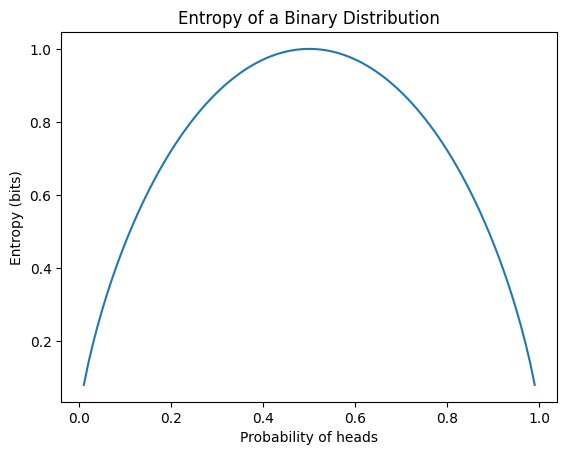

In [ ]:
from dldna.chapter_02.information_theory import calculate_entropy
calculate_entropy()


#### 상호 정보량

상호 정보량(Mutual Information)은 두 확률 변수 X와 Y 사이의 상호 의존성을 측정합니다. 수학적으로 다음과 같이 정의됩니다.

$$I(X;Y) = \sum_{x}\sum_{y} P(x,y) \log \frac{P(x,y)}{P(x)P(y)}$$

상호 정보량의 주요 특성은 다음과 같습니다.

1.  비음수성: $I(X;Y) \ge 0$
2.  대칭성: $I(X;Y) = I(Y;X)$
3.  X와 Y가 독립일 때 0: X와 Y가 독립이면 $I(X;Y) = 0$

상호 정보량은 특징 선택, 차원 축소 등 다양한 머신러닝 작업에서 활용됩니다. 다음 예제는 간단한 결합 확률 분포에 대한 상호 정보량을 계산하고 시각화합니다.

Mutual Information: 0.0058


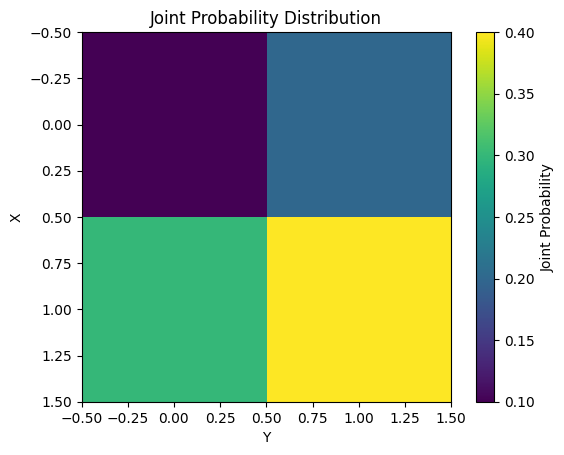

In [ ]:
from dldna.chapter_02.information_theory import mutual_information_example
mutual_information_example()


#### KL 발산

KL(Kullback-Leibler) 발산은 두 확률 분포 P와 Q의 차이를 측정하는 방법입니다. P에 대한 Q의 KL 발산은 다음과 같이 정의됩니다.

$$D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)}$$

KL 발산의 주요 특성은 다음과 같습니다.

1.  비음수성: $D_{KL}(P||Q) \ge 0$
2.  P = Q일 때만 0: $D_{KL}(P||Q) = 0$ if and only if $P = Q$
3.  비대칭성: 일반적으로 $D_{KL}(P||Q) \ne D_{KL}(Q||P)$


KL 발산은 딥러닝에서 다음과 같이 활용됩니다.

1. 변분 추론: 근사 분포와 실제 분포의 차이를 최소화하는 데 사용됩니다.
2. 모델 압축: 교사-학생 네트워크에서 지식 증류에 활용됩니다.
3. 이상 탐지: 정상 데이터 분포와의 차이를 측정하는 데 사용됩니다.

정보 이론의 개념들은 서로 밀접하게 연관되어 있습니다. 예를 들어, 상호 정보량은 엔트로피와 조건부 엔트로피의 차이로 표현할 수 있습니다.

$I(X;Y) = H(X) - H(X|Y)$

또한, KL 발산은 교차 엔트로피와 엔트로피의 차이로 나타낼 수 있습니다.

$D_{KL}(P||Q) = H(P,Q) - H(P)$

여기서 $H(P,Q)$는 $P$와 $Q$의 교차 엔트로피입니다. 다음은 두 확률 분포 간의 KL 발산을 계산하고 분포를 시각화합니다.

KL(P||Q): 0.0823
KL(Q||P): 0.0872


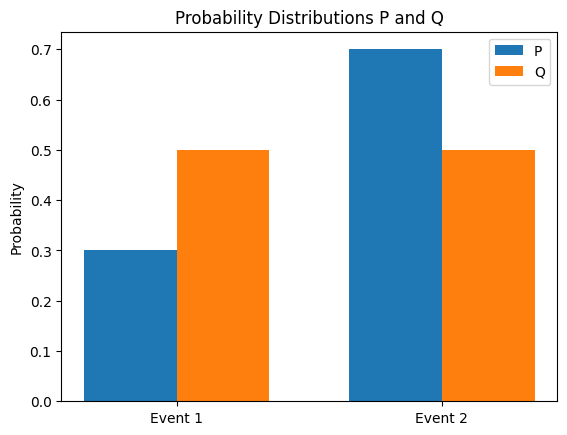

In [ ]:
from dldna.chapter_02.information_theory import kl_divergence_example
kl_divergence_example()

이러한 정보 이론의 개념들은 딥러닝 모델의 설계와 최적화에 광범위하게 적용됩니다. 예를 들어, 오토인코더의 손실 함수로 재구성 오차와 KL 발산의 조합을 사용하거나, 강화학습에서 정책 최적화를 위해 KL 발산을 제약 조건으로 사용하는 등 다양한 방식으로 활용됩니다.

다음 장에서는 이러한 확률, 통계, 정보 이론의 개념들이 실제 딥러닝 모델에서 어떻게 적용되는지 살펴보겠습니다.

::: {.callout-note collapse="true" title="딥다이브: 정보 이론 핵심 개념"}

## 정보 이론 핵심 개념 - Information Content, Cross Entropy, KL-Divergence, Mutual Information

### 1. Information Content (Self-information)

- **정의:** 정보량 (Information Content, Self-information)은 특정 사건이 발생했을 때 얻을 수 있는 정보의 양을 나타냅니다. 드물게 발생하는 사건일수록 더 높은 정보량을 갖습니다.

- **수식:**
    $$I(x) = -\log(P(x))$$
    -   $x$: 사건
    -   $P(x)$: 사건 $x$가 발생할 확률
    -   $\log$: 로그의 밑(base)은 2 (단위: bits), $e$ (단위: nats), 또는 10 등이 사용될 수 있습니다. 일반적으로 딥러닝에서는 자연로그($e$)를 사용합니다.

- **직관적 설명:**
    -   **희귀성:** 확률이 낮은 사건(희귀한 사건)일수록 정보량이 큽니다. 예를 들어, "해가 동쪽에서 뜬다"는 당연한 사실이므로 정보량이 거의 없지만, "오늘 로또 1등에 당첨되었다"는 매우 드문 사건이므로 정보량이 큽니다.
    -   **불확실성 감소:** 정보량은 사건 발생 전의 불확실성이 사건 발생 후 얼마나 감소했는지를 나타내는 척도로 해석할 수 있습니다.

- **성질:**
    -   $0 \le P(x) \le 1$ 이므로, $I(x) \ge 0$ 입니다.
    -   $P(x) = 1$ (확실한 사건) 이면, $I(x) = 0$ 입니다.
    -   $P(x)$가 작을수록 $I(x)$는 커집니다.
    -   두 독립 사건 $x$와 $y$에 대해, $I(x, y) = I(x) + I(y)$ 입니다. (정보량의 가법성)

### 2. Cross Entropy

- **정의:** 크로스 엔트로피(Cross Entropy)는 두 확률 분포 $P$와 $Q$가 얼마나 다른지를 측정하는 척도입니다. $P$를 참 분포, $Q$를 추정 분포라고 할 때, $Q$를 사용하여 $P$를 나타낼 때 필요한 평균 비트 수를 나타냅니다.

- **유도:**
    1.  **정보량:** 참 분포 $P$를 따르는 사건 $x$의 정보량: $I(x) = -\log P(x)$
    2.  **평균 정보량 (엔트로피):** 참 분포 $P$에 대한 평균 정보량 (엔트로피):  $H(P) = -\sum_{x} P(x) \log P(x)$
    3.  **추정 분포 사용:**  추정 분포 $Q$를 사용하여 참 분포 $P$를 나타낼 때, 각 사건 $x$에 대한 정보량: $-\log Q(x)$
    4.  **Cross Entropy:** 추정 분포 $Q$를 사용하여 참 분포 $P$를 나타낼 때의 평균 정보량:
        $$H(P, Q) = -\sum_{x} P(x) \log Q(x)$$

- **직관적 설명:**
    -   $P$와 $Q$가 비슷할수록 크로스 엔트로피는 작아집니다.
    -   $P = Q$ 일 때, 크로스 엔트로피는 최소값(엔트로피 $H(P)$)을 갖습니다.
    -   $P$와 $Q$가 다를수록 크로스 엔트로피는 커집니다. 즉, 추정 분포가 실제 분포를 잘 반영하지 못할수록 정보 손실이 발생합니다.

- **Binary Cross Entropy (BCE):**
    -   두 개의 클래스 (0 또는 1)를 갖는 이진 분류 문제에서 사용됩니다.
    -   $P = [p, 1-p]$ (실제 클래스 확률 분포, $p$는 클래스 1의 확률)
    -   $Q = [q, 1-q]$ (예측 클래스 확률 분포, $q$는 클래스 1로 예측할 확률)
    -   $$H(P, Q) = -[p \log q + (1-p) \log (1-q)]$$

- **Categorical Cross Entropy (CCE):**
    -   여러 개의 클래스를 갖는 다중 클래스 분류 문제에서 사용됩니다.
    -   $P = [p_1, p_2, ..., p_k]$ (실제 클래스 확률 분포, $p_i$는 $i$번째 클래스의 확률, one-hot encoding)
    -   $Q = [q_1, q_2, ..., q_k]$ (예측 클래스 확률 분포, $q_i$는 $i$번째 클래스로 예측할 확률, softmax)
    -    $$H(P, Q) = -\sum_{i=1}^{k} p_i \log q_i$$

### 3. Cross Entropy와 Likelihood

- **Likelihood (가능도):** 주어진 데이터가 특정 모델(모수)에서 발생했을 확률.
- **Negative Log-Likelihood (NLL):** 가능도에 로그를 취하고 음수를 붙인 값.
- **Cross Entropy와 NLL의 관계:**
    -   분류 문제에서, 모델의 출력(예측 확률 분포)을 $Q$, 실제 레이블(one-hot encoding)을 $P$라고 할 때, Cross Entropy는 Negative Log-Likelihood와 같습니다.
    -  Cross Entropy를 최소화하는 것은 Likelihood를 최대화하는 것과 같습니다(Maximum Likelihood Estimation, MLE).
- **딥러닝에서의 활용:**
  - 딥러닝에서 분류 문제의 손실 함수(loss function)로 Cross Entropy를 사용하는 것은 모델의 출력이 실제 레이블의 분포를 따르도록 학습하는 것과 같습니다(MLE 관점).

### 4. KL-Divergence와 Cross Entropy 관계

-   **KL-Divergence (Kullback-Leibler Divergence):**
    -   두 확률 분포 $P$와 $Q$의 차이를 측정하는 또 다른 방법입니다(거리 개념은 아님, 비대칭적).
    -   $P$에서 $Q$로의 KL-Divergence는 $Q$를 사용하여 $P$를 표현할 때 추가적으로 필요한 정보량을 나타냅니다.
    -   $$D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)} = \sum_{x} P(x)[\log P(x) - \log Q(x)]$$

-   **KL-Divergence와 Cross Entropy의 관계:**

    $$D_{KL}(P||Q) = \sum_{x} P(x) \log P(x) - \sum_{x} P(x) \log Q(x) =  -\sum_{x} P(x) \log Q(x)  - (-\sum_{x} P(x) \log P(x))$$
     $$D_{KL}(P||Q) = H(P, Q) - H(P)$$
      - $H(P,Q)$: Cross Entropy
      - $H(P)$: Entropy

    - KL-Divergence는 Cross Entropy에서 $P$의 Entropy를 뺀 값입니다.
    - $P$가 고정되어 있을 때, Cross Entropy를 최소화하는 것은 KL-Divergence를 최소화하는 것과 같습니다.

### 5. Mutual Information과 Conditional Entropy 관계

- **Mutual Information (상호 정보량):**
    - 두 확률 변수 $X$와 $Y$가 서로 얼마나 많은 정보를 공유하는지를 나타내는 척도입니다.
    - $X$를 알 때 $Y$에 대한 불확실성이 얼마나 감소하는지 (또는 그 반대)를 나타냅니다.
    -  $$I(X;Y) = \sum_{x, y} P(x, y) \log \frac{P(x, y)}{P(x)P(y)}$$
       - $P(x,y)$: 결합 확률 분포 (Joint Probability Distribution)
       - $P(x)$, $P(y)$: 주변 확률 분포 (Marginal Probability Distribution)

- **Conditional Entropy (조건부 엔트로피):**
    - 확률 변수 $Y$가 주어졌을 때, 확률 변수 $X$의 불확실성을 나타냅니다.
     $$H(X|Y) = -\sum_{y} P(y) \sum_{x} P(x|y) \log P(x|y) =  -\sum_{x,y} P(x,y) \log P(x|y)$$

-  **Mutual Information과 Conditional Entropy 관계**:
  $$I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X)$$

    - $X$와 $Y$의 상호 정보량은 $X$의 엔트로피에서 $Y$를 알 때의 $X$의 조건부 엔트로피를 뺀 값과 같습니다.
    - $Y$를 알게 됨으로써 $X$의 불확실성이 감소하는 정도를 나타냅니다.

### 6. Jensen–Shannon Divergence

- **Jensen–Shannon Divergence (JSD):**
    - 두 확률 분포 $P$와 $Q$ 사이의 거리를 측정하는 또 다른 방법입니다. KL-Divergence와 달리 대칭적(symmetric)이며, bounded (0과 1 사이)입니다.
    -  $$JSD(P||Q) = \frac{1}{2}D_{KL}(P||M) + \frac{1}{2}D_{KL}(Q||M)$$
       - $M = \frac{1}{2}(P + Q)$: $P$와 $Q$의 평균 분포

- **특징:**
    - 대칭성: $JSD(P||Q) = JSD(Q||P)$
    - 유계성: $0 \le JSD(P||Q) \le 1$ (log base 2를 사용할 때)
    - JSD의 제곱근은 거리 함수(metric)의 조건을 만족합니다.

:::

### 2.3.4 손실 함수

손실 함수(Loss Function)는 머신러닝 모델의 예측이 실제 값과 얼마나 차이가 나는지를 측정하는 함수입니다. 모델 학습의 목표는 이 손실 함수의 값을 최소화하는 파라미터(가중치와 편향)를 찾는 것입니다. 적절한 손실 함수를 선택하는 것은 모델의 성능에 큰 영향을 미치므로, 문제의 유형과 데이터의 특성에 맞게 신중하게 선택해야 합니다.

#### 손실 함수의 정의

일반적으로 손실 함수 $L$은 모델의 파라미터를 $\theta$, 데이터 포인트를 $(x_i, y_i)$라고 할 때, 다음과 같이 표현할 수 있습니다. (여기서 $y_i$는 실제 값, $f(x_i; \theta)$는 모델의 예측값)

$L(\theta) = \frac{1}{N} \sum_{i=1}^{N} l(y_i, f(x_i; \theta))$

$N$은 데이터 포인트의 개수, $l$은 개별 데이터 포인트에 대한 손실을 나타내는 함수(loss term)입니다.

#### 주요 손실 함수

다음은 머신러닝과 딥러닝에서 자주 사용되는 손실 함수들입니다.

##### 1. 평균 제곱 오차 (Mean Squared Error, MSE)

*   **수식:**  $MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$  ($y_i$: 실제값, $\hat{y}_i$: 예측값)
*   **특징:**
    *   오차를 제곱하기 때문에 이상치(outlier)에 민감합니다.
    *   미분 가능하며, 볼록 함수(convex function)이므로 경사 하강법을 사용하여 최적해를 찾기 쉽습니다.
*   **용도:** 주로 회귀(Regression) 문제에 사용됩니다.

##### 2. 평균 절대 오차 (Mean Absolute Error, MAE)

*   **수식:** $MAE = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$
*   **특징:**
    *   MSE보다 이상치에 덜 민감합니다.
    *    x=0에서 미분 불가능하지만, 딥러닝 프레임워크에서 자동 미분으로 처리 가능.
* **용도**: 회귀 문제에 사용

##### 3. 교차 엔트로피 손실 (Cross-Entropy Loss)

*   **수식:**
    *   **이진 분류 (Binary Classification):**
        $L = -\frac{1}{N} \sum_{i=1}^N [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$
    *   **다중 클래스 분류 (Multi-class Classification):**
        $L = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^C y_{ij} \log(\hat{y}_{ij})$  ($C$: 클래스 수)
*   **특징:**
    *   모델이 예측한 확률 분포와 실제 분포 사이의 차이를 측정합니다.
    *   분류 문제에서 MSE보다 빠르게 수렴하는 경향이 있습니다.
    *  출력층에 소프트맥스(softmax) 활성화 함수와 함께 사용.
*   **용도:** 분류 문제 (이진 분류, 다중 클래스 분류)

##### 4. 힌지 손실 (Hinge Loss)

* **수식:** $L = \max(0, 1 - y \cdot f(x))$  ($y$: {-1, 1} 실제 클래스, $f(x)$: 모델 예측값)
* **특징:**
  *   "정답"과 "오답" 사이의 마진(margin)을 최대화.
  *   x=1에서 미분 불가능
* **용도:** 주로 서포트 벡터 머신(SVM)과 같은 이진 분류 문제.

#### 손실 함수 선택 기준

*   **문제 유형:** 회귀 문제인지, 분류 문제인지에 따라 적합한 손실 함수가 달라집니다.
*   **데이터 특성:** 이상치 유무, 클래스 불균형 등에 따라 적절한 손실 함수를 선택해야 합니다.
*  **모델**: 사용하는 모델에 따라 적절한 손실함수가 달라진다.

#### 추가적인 손실 함수

*   **Kullback-Leibler Divergence (KLD):** 두 확률 분포 P와 Q 사이의 차이를 측정합니다. 주로 변분 오토인코더(VAE)와 같은 생성 모델에서 사용.
*   **Focal Loss:** 불균형 데이터에서 잘 작동하도록 Cross-Entropy를 조정한 손실함수. 객체 인식 문제에서 주로 활용.
* **Huber Loss:** MSE와 MAE를 결합한 형태로, 이상치에 강건하면서도 미분 가능합니다.
*   **Log-Cosh Loss:** Huber Loss와 유사하지만, 모든 지점에서 두 번 미분 가능하다는 장점이 있습니다.
*   **Contrastive Loss:** Siamese Network 등에서 사용되며, 유사한 샘플 쌍은 가깝게, 유사하지 않은 샘플 쌍은 멀리 떨어지도록 임베딩을 학습하는 데 사용됩니다.
*   **Triplet Loss:** Anchor, Positive, Negative 세 개의 샘플을 사용하여, Anchor와 Positive 샘플 사이의 거리는 가깝게, Anchor와 Negative 샘플 사이의 거리는 멀어지도록 임베딩을 학습합니다.
*   **CTC Loss:** 음성 인식, 필기 인식 등에서 입력 시퀀스와 출력 시퀀스의 길이가 다를 때 사용되는 손실 함수입니다.


::: {.callout-note collapse="true" title="클릭하여 내용 보기(딥다이브 : 손실 함수 심층 분석)"}

### 손실 함수 심층 분석

#### 손실 함수와 최대 우도 추정 (Maximum Likelihood Estimation, MLE)

많은 머신러닝 모델의 학습은 최대 우도 추정(MLE) 관점에서 설명할 수 있습니다. MLE는 주어진 데이터를 가장 잘 설명하는 모델 파라미터를 찾는 방법입니다. 데이터가 독립적이고 동일한 분포(i.i.d)를 따른다고 가정할 때, 우도 함수(Likelihood Function)는 다음과 같이 정의됩니다.

$L(\theta) = P(D|\theta) = \prod_{i=1}^{N} P(y_i | x_i; \theta)$

여기서 $D = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}$는 훈련 데이터, $\theta$는 모델 파라미터입니다.  $P(y_i | x_i; \theta)$는 모델이 $x_i$를 입력으로 받았을 때 $y_i$를 출력할 확률(또는 확률 밀도)입니다.

MLE의 목표는 우도 함수 $L(\theta)$를 최대화하는 파라미터 $\theta$를 찾는 것입니다.  실제로는 로그 우도 함수(log-likelihood function)를 최대화하는 것이 계산상 더 편리합니다.

$\log L(\theta) = \sum_{i=1}^{N} \log P(y_i | x_i; \theta)$

*   **MSE와 MLE:**
    선형 회귀 모델에서 오차가 평균이 0이고 분산이 $\sigma^2$인 정규 분포를 따른다고 가정하면, MLE는 MSE를 최소화하는 것과 동일합니다.

    $P(y_i | x_i; \theta) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - f(x_i; \theta))^2}{2\sigma^2}\right)$

    로그 우도 함수는 다음과 같습니다.
    $\log L(\theta) = -\frac{N}{2}\log(2\pi\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{N}(y_i - f(x_i;\theta))^2$

     상수를 제외하고, $\sigma^2$이 상수라고 가정하면 로그 우도 함수를 최대화하는 것은 MSE를 *최소화*하는 것과 같습니다.

*   **Cross-Entropy와 MLE:**
    분류 문제에서, 출력 $\hat{y}_i$를 베르누이 분포(이진 분류) 또는 다항 분포(다중 클래스 분류)의 파라미터로 해석할 수 있습니다. 이 경우, MLE는 Cross-Entropy Loss를 최소화하는 것과 동일합니다.

    *   **이진 분류 (베르누이 분포):** $\hat{y_i}$를 모델이 예측한, $y_i=1$일 확률이라고 하면,
        $P(y_i|x_i;\theta) = \hat{y_i}^{y_i} (1 - \hat{y_i})^{(1-y_i)}$
        로그 우도: $\log L(\theta) = \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)]$

    *  **다중 클래스 분류 (Categorical/Multinoulli Distribution):**
        $P(y_i | x_i; \theta) = \prod_{j=1}^{C} \hat{y}_{ij}^{y_{ij}}$ (one-hot encoding)
         로그 우도: $\log L(\theta) = \sum_{i=1}^N \sum_{j=1}^C y_{ij} \log(\hat{y}_{ij})$

    따라서 Cross-Entropy Loss를 최소화하는 것은 데이터의 분포를 가장 잘 모델링하는 파라미터를 찾는 MLE와 동일한 과정입니다.

#### 추가적인 손실 함수 (KLD, Focal Loss)

*   **Kullback-Leibler Divergence (KLD):**

    *   **설명:** 두 확률 분포 P와 Q 사이의 차이를 측정합니다.  P는 실제 데이터의 분포, Q는 모델이 추정한 분포를 나타냅니다.
    *   **수식:** $D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)}$
    *   **특징:**
        *   비대칭적(asymmetric): $D_{KL}(P||Q) \neq D_{KL}(Q||P)$
        *   항상 0 이상: $D_{KL}(P||Q) \ge 0$,  $P=Q$일 때만 $D_{KL}(P||Q) = 0$
        * P(x) = 0 인 곳에서 정의되지 않는 문제
    * **VAE와의 관계:**
        * 변분 오토인코더(Variational Autoencoder, VAE)에서는 잠재 변수(latent variable)의 사후 분포(posterior distribution)를 정규 분포와 같은 사전 분포(prior distribution)에 가깝게 만들기 위해 KL Divergence를 사용합니다.
        * VAE의 손실 함수는 재구성 손실(reconstruction loss)과 KL Divergence 항으로 구성됩니다.

*   **Focal Loss:**

    *   **설명:**  Cross-Entropy Loss를 변형하여 클래스 불균형 문제, 특히 "쉬운" 샘플(easy examples)과 "어려운" 샘플(hard examples) 간의 불균형을 해결하기 위해 제안되었습니다.
    *   **수식:** $FL(p_t) = -\alpha_t (1 - p_t)^\gamma \log(p_t)$
        *   $p_t$: 모델이 예측한 정답 클래스에 대한 확률
        *   $\gamma$: focusing parameter ($\gamma \ge 0$, 일반적으로 2)
        *   $\alpha_t$: 클래스별 가중치 (선택 사항)
    *   **특징:**
        *   $\gamma = 0$ 이면, 일반적인 Cross-Entropy Loss와 동일.
        *   $\gamma > 0$ 이면, 잘 분류되는 샘플($p_t$가 큼)의 손실은 줄이고, 잘 분류되지 않는 샘플($p_t$가 작음)의 손실은 상대적으로 크게 유지. 즉, 어려운 샘플에 더 집중하여 학습.
        *   $\alpha_t$를 사용하여 클래스별 가중치를 조절할 수 있음 (예: 수가 적은 클래스에 더 큰 가중치 부여).
    * **객체 인식(Object Detection)에서의 활용:**
      *  객체 검출 문제는 배경 영역(negative)이 객체 영역(positive)보다 훨씬 많아 심각한 클래스 불균형 발생.
      * Focal Loss는 이러한 불균형을 완화하여, 객체 검출 모델이 배경보다는 실제 객체에 더 집중하여 학습하도록 유도.

#### 다양한 손실 함수 (고급)

*   **Huber Loss:** MSE와 MAE의 장점을 결합한 손실 함수입니다. 오차가 특정 값($\delta$)보다 작을 때는 MSE처럼 제곱 오차를 사용하고, 오차가 클 때는 MAE처럼 절댓값 오차를 사용합니다.  이상치에 강건하면서도 미분 가능합니다.

    $L_\delta(y, \hat{y}) = \begin{cases}
    \frac{1}{2}(y - \hat{y})^2 & \text{if } |y - \hat{y}| \le \delta \\
    \delta(|y - \hat{y}| - \frac{1}{2}\delta) & \text{otherwise}
    \end{cases}$

*   **Log-Cosh Loss:**  $\log(\cosh(y - \hat{y}))$로 정의됩니다. Huber Loss와 유사하게 이상치에 강건하며, 모든 지점에서 두 번 미분 가능하다는 장점이 있습니다.

*   **Quantile Loss:**  특정 분위수(quantile)에서의 예측 오차를 최소화하는 데 사용됩니다.

*   **Contrastive Loss, Triplet Loss:**  Siamese Network, Triplet Network 등에서 사용되며, 유사한 샘플 쌍/세 쌍 간의 거리를 조절하는 데 사용됩니다. (자세한 내용은 관련 논문 참고)

* **Connectionist Temporal Classification (CTC) Loss**: 음성 인식, 필기 인식 등 입력 시퀀스와 출력 시퀀스 간의 정렬(alignment)이 명확하지 않은 경우에 사용됩니다.

#### 손실 함수 선택 가이드라인 (심화)

*   **이상치 처리:** 이상치가 많고, 이상치에 강건(robust)해야 하는 경우, MAE, Huber Loss, Quantile Loss 등을 고려할 수 있습니다.
*   **미분 가능성:** 경사 하강법 기반 최적화를 위해서는 미분 가능한 손실 함수가 필요합니다. 하지만 Hinge Loss, MAE와 같이 미분 불가능한 점이 있는 경우에도, subgradient(subdifferential)를 사용하거나, 딥러닝 프레임워크의 자동 미분을 통해 해결할 수 있습니다.
*   **확률적 모델링:** 모델의 출력을 확률 분포로 해석하고 싶은 경우, Cross-Entropy Loss가 적합합니다.
*   **클래스 불균형:** 클래스 불균형이 심한 경우, Focal Loss, Weighted Cross-Entropy 등을 고려할 수 있습니다.
*  **다중 출력**: 여러 출력이 있고 출력간의 상관관계가 존재한다면, 각 출력에 대한 손실함수를 결합해서 사용.

손실 함수는 딥러닝 모델의 성능을 결정하는 중요한 요소 중 하나입니다. 문제의 특성과 데이터의 분포, 그리고 모델의 구조를 고려하여 적절한 손실 함수를 선택하고, 필요하다면 새로운 손실 함수를 설계하는 능력이 딥러닝 엔지니어에게 요구됩니다.
:::


::: {.callout-note collapse="true" title="클릭하여 내용 보기(딥다이브 : 새로운 손실 함수 설계)"}

### 새로운 손실 함수 설계

기존의 손실 함수(MSE, Cross-Entropy 등)가 항상 최적의 선택은 아닙니다. 문제의 특수한 요구 사항, 데이터의 분포, 모델의 구조 등에 따라 새로운 손실 함수를 설계해야 할 필요가 있습니다. 새로운 손실 함수를 설계하는 것은 딥러닝 연구의 중요한 부분이며, 모델의 성능을 크게 향상시킬 수 있는 잠재력을 가지고 있습니다.

#### 새로운 손실 함수가 필요한 경우

*   **데이터의 특수한 구조:** 데이터가 일반적인 분포(가우시안, 베르누이 등)를 따르지 않거나, 특별한 구조(예: 순위, 희소성, 계층 구조, 그래프 구조)를 갖는 경우.
*   **문제의 특수한 제약 조건:** 모델의 예측에 특정한 제약 조건(예: monotonicity, sparsity, fairness, robustness)을 부여하고 싶은 경우.
*   **기존 손실 함수의 한계:** 기존 손실 함수가 특정 문제에서 잘 작동하지 않거나(예: 이상치에 민감, 클래스 불균형), 원하는 목표를 충분히 반영하지 못하는 경우.  특정 metric을 직접 최적화하고 싶은 경우.
*   **다중 목표 최적화 (Multi-objective optimization):** 여러 개의 손실 함수를 결합하여 동시에 최적화해야 하는 경우.  (예: 예측 정확도와 모델 복잡도 사이의 균형)
* **생성 모델**: 생성 모델(Generative Models)은 데이터의 분포를 학습하는 것이 목표이므로, 일반적인 분류/회귀 문제와는 다른 손실 함수가 필요.

#### 새로운 손실 함수 설계 원칙

새로운 손실 함수를 설계할 때는 다음 원칙들을 고려해야 합니다.

1.  **문제 정의와 목표:** 해결하고자 하는 문제와 모델의 궁극적인 목표를 명확히 정의해야 합니다. 손실 함수는 모델이 무엇을 학습해야 하는지를 정의하는 핵심 요소입니다. (예: 단순히 분류 정확도를 높이는 것인지, 특정 클래스를 더 잘 맞추는 것인지, False Positive/False Negative 비율을 조절하는 것인지 등)

2.  **수학적 타당성:**
    *   **미분 가능성 (Differentiability):** 경사 하강법 기반 최적화를 위해서는 손실 함수가 (거의) 모든 지점에서 미분 가능해야 합니다. 미분 불가능한 점이 있더라도 subgradient(subdifferential)를 사용할 수 있어야 합니다.
    *   **볼록성 (Convexity):** 손실 함수가 볼록 함수이면, 전역 최적해(global minimum)를 찾을 수 있음을 보장합니다. 볼록하지 않은(non-convex) 함수인 경우에도, 좋은 지역 최적해(local minimum)를 찾을 수 있도록 설계해야 합니다.
    *   **Gradient Vanishing/Exploding 방지:** 너무 크거나 작은 gradient는 학습을 불안정하게 만듭니다.  ReLU의 "dying ReLU" 문제나 sigmoid/tanh의 vanishing gradient 문제처럼, 특정 상황에서 gradient가 0이나 매우 작은 값이 되지 않도록 주의해야 합니다.
    * **Scale Invariance**: 입력 데이터나 파라미터의 스케일에 따라 손실 함수의 값이 크게 변하지 않도록 설계.

3.  **해석 가능성 (Interpretability):** 손실 함수의 의미를 직관적으로 이해할 수 있으면, 모델의 학습 과정을 분석하고 디버깅하는 데 도움이 됩니다. 각 항(term)이 어떤 역할을 하는지, 어떤 의미를 가지는지 명확해야 합니다.  하이퍼파라미터의 의미와 영향도 명확해야 합니다.

4.  **계산 효율성 (Computational Efficiency):** 손실 함수는 매 반복(iteration)마다, 그리고 모든(또는 미니배치) 데이터 포인트에 대해 계산되므로, 계산 비용이 너무 크면 학습 속도가 느려질 수 있습니다.

#### 새로운 손실 함수 설계 방법론

1.  **기존 손실 함수 변형/결합:**
    *   **가중치 추가:** 특정 데이터 포인트, 클래스, 또는 출력에 더 큰 가중치를 부여합니다 (예: Weighted Cross-Entropy, Focal Loss).
    *   **정규화 항 추가:** 모델의 복잡도를 제한하거나, 특정 속성을 장려하기 위해 정규화 항(regularization term)을 추가합니다 (예: L1 regularization, L2 regularization, Elastic Net).  출력의 smoothness를 위한 정규화 항을 추가할 수도 있습니다.
    *   **여러 손실 함수 결합:** 여러 개의 기존 손실 함수를 선형 결합(weighted sum)하거나, 다른 방식으로 결합합니다.  (예: Multi-task learning)
    * **Soft/Hard Label Smoothing**: Label Smoothing Regularization은 모델이 정답에 대해 너무 확신하는 것을 방지합니다.

2.  **확률적 모델링 기반 설계:**
    *   **최대 우도 추정 (MLE):** 데이터의 분포를 가정하고, 그 분포의 파라미터를 추정하는 관점에서 손실 함수를 설계합니다. (예: MSE는 가우시안 분포 가정 하의 MLE, Cross-Entropy는 베르누이/다항 분포 가정 하의 MLE)
    *   **Variational Inference:** 근사 추론(variational inference) 방법을 사용하여, intractable한 사후 분포(posterior distribution)를 근사하는 손실 함수(ELBO, Evidence Lower Bound)를 설계합니다. (예: Variational Autoencoder)
    * **Implicit Likelihood**: 생성 모델에서 likelihood를 명시적으로 계산하기 어려울 때, likelihood-free 방법(예: GAN)을 사용

3.  **문제 특화 손실 함수 설계:**

    *   **Ranking Loss:** 순위(ranking)를 매기는 문제에 적합한 손실 함수를 설계합니다 (예: pairwise ranking loss, listwise ranking loss, margin ranking loss).
    *   **Object Detection Loss:** 객체 검출(object detection) 문제에서, bounding box regression과 class classification을 동시에 고려하는 손실 함수를 설계합니다 (예: YOLO, SSD, Faster R-CNN의 손실 함수).
    *   **Segmentation Loss:** 이미지 분할(image segmentation) 문제에서, 각 픽셀의 클래스를 예측하고, ground truth segmentation map과의 차이를 최소화하는 손실 함수를 설계합니다 (예: Dice Loss, IoU Loss, Tversky Loss).
    *   **Generative Model Loss:** GAN, VAE와 같은 생성 모델에서 사용되는 생성자와 판별자를 위한 손실 함수 (예: Wasserstein distance, Adversarial Loss).
    * **Metric Learning Loss**: Contrastive Loss, Triplet Loss, N-pair Loss 등.
    * **Sequence Loss:** CTC Loss, Sequence-to-sequence 모델의 Cross-Entropy 등.
    * **Graph Data Loss**: Graph Neural Networks에서 사용되는 손실 함수 (node classification, link prediction, graph classification 등)


#### 새로운 손실 함수 설계 시 주의사항

*   **과도한 복잡성:** 너무 복잡한 손실 함수는 학습을 어렵게 만들고, 과적합(overfitting)을 유발할 수 있습니다.  간단한 손실 함수에서 시작하여 점진적으로 복잡도를 늘려가는 것이 좋습니다.
*   **하이퍼파라미터 튜닝:** 새로운 손실 함수는 추가적인 하이퍼파라미터(예: Focal Loss의 $\gamma$, 가중치 조합 시 가중치)를 포함하는 경우가 많습니다.  이러한 하이퍼파라미터를 적절하게 튜닝하는 것이 중요하며, 교차 검증(cross-validation) 등을 통해 최적의 값을 찾아야 합니다.
*   **이론적/경험적 근거:** 새로운 손실 함수를 제안할 때는 왜 이 손실 함수가 잘 작동하는지에 대한 이론적 근거(예: 특정 문제의 수학적 특성, MLE와의 관계) 또는 경험적 근거(예: 실험 결과)를 제시해야 합니다.

새로운 손실 함수를 설계하는 것은 창의적인 과정이지만, 동시에 신중한 접근이 필요합니다. 문제의 본질을 깊이 이해하고, 수학적/통계적 원리에 기반하여 설계하며, 철저한 실험을 통해 성능을 검증하는 것이 중요합니다.

:::


이 장에서는 딥러닝의 수학적 기초를 살펴보았습니다. 선형 대수, 미적분, 확률 및 통계, 정보 이론 등 다양한 분야의 개념들이 딥러닝 모델의 설계, 학습, 분석에 어떻게 활용되는지 알아보았습니다. 이러한 수학적 도구들은 복잡한 신경망 구조를 이해하고, 효율적인 학습 알고리즘을 개발하며, 모델의 성능을 평가하고 개선하는 데 필수적입니다. 또한 딥러닝 연구의 최전선에서 새로운 돌파구를 찾는 데에도 중요한 역할을 합니다.

## 연습문제

### 1. 선형대수학

#### 기본

1.  두 벡터 $\mathbf{a} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ 와 $\mathbf{b} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ 의 내적(dot product)을 계산하시오.

2.  행렬 $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ 와 벡터 $\mathbf{b} = \begin{bmatrix} 5 \\ 6 \end{bmatrix}$ 의 곱 $\mathbf{Ab}$ 를 계산하시오.

3.  2x2 단위 행렬(identity matrix)을 생성하시오.

4.  벡터의 L1 norm과 L2 norm의 정의를 쓰고, 벡터 $\mathbf{v} = \begin{bmatrix} 3 \\ -4 \end{bmatrix}$ 의 L1 norm과 L2 norm을 계산하시오.

#### 응용

1.  행렬 $\mathbf{A} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$ 의 고유값(eigenvalue)과 고유벡터(eigenvector)를 구하시오.

2.  주어진 행렬의 역행렬이 존재하는지 판별하고, 존재한다면 역행렬을 계산하시오.
    $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$

3.  선형 변환 $T(\mathbf{x}) = \mathbf{Ax}$ 가 주어졌을 때, 기저(basis) 벡터 $\mathbf{e_1} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$ 와 $\mathbf{e_2} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$ 가 어떻게 변환되는지 설명하고, 그 결과를 시각화하시오. (단, $\mathbf{A} = \begin{bmatrix} 2 & -1 \\ 1 & 1 \end{bmatrix}$)

4.  다음 행렬의 랭크(rank)를 계산하시오.
    $\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

#### 심화

1.  특이값 분해(Singular Value Decomposition, SVD)의 정의를 쓰고, 주어진 행렬 $\mathbf{A}$ 를 SVD로 분해하시오.
    $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}$

2.  주성분 분석(Principal Component Analysis, PCA)의 목적과 과정을 설명하고, 주어진 데이터셋에 대해 PCA를 수행하여 1차원으로 차원을 축소하시오.

    ```python
    import numpy as np
    data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
    ```

3.  다음 행렬의 영공간(null space)과 열공간(column space)의 기저(basis)를 구하시오.
    $\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

4.  QR 분해의 정의를 쓰고, 주어진 행렬 $\mathbf{A}$ 를 QR 분해하시오.  (QR 분해는 수치적으로 안정적인 방법으로, 선형 방정식의 해를 구하거나, 고유값 문제를 해결하는 데 사용됩니다.)
    $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$

::: {.callout-note collapse="true" title="클릭하여 내용 보기(해답)"}

## 연습문제 해답


### 1. 선형대수학

#### 기본

1.  **내적 계산:**
    $\mathbf{a} \cdot \mathbf{b} = (1)(3) + (2)(4) = 3 + 8 = 11$

2.  **행렬-벡터 곱:**
    $\mathbf{Ab} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 5 \\ 6 \end{bmatrix} = \begin{bmatrix} (1)(5) + (2)(6) \\ (3)(5) + (4)(6) \end{bmatrix} = \begin{bmatrix} 17 \\ 39 \end{bmatrix}$

3.  **2x2 단위 행렬:**
    $\mathbf{I} = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

4.  **L1, L2 Norm:**
    *   L1 Norm (Manhattan Distance):  $||\mathbf{v}||_1 = \sum_{i} |v_i|$
    *   L2 Norm (Euclidean Distance):  $||\mathbf{v}||_2 = \sqrt{\sum_{i} v_i^2}$

    $\mathbf{v} = \begin{bmatrix} 3 \\ -4 \end{bmatrix}$
    $||\mathbf{v}||_1 = |3| + |-4| = 3 + 4 = 7$
    $||\mathbf{v}||_2 = \sqrt{(3)^2 + (-4)^2} = \sqrt{9 + 16} = \sqrt{25} = 5$

#### 응용

1.  **고유값, 고유벡터:**
    $\mathbf{A} = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$

    *   **특성 방정식:**  $\det(\mathbf{A} - \lambda\mathbf{I}) = 0$
        $(2-\lambda)^2 - (1)(1) = 0$
        $\lambda^2 - 4\lambda + 3 = 0$
        $(\lambda - 3)(\lambda - 1) = 0$
        $\lambda_1 = 3$, $\lambda_2 = 1$

    *   **고유벡터 (λ = 3):**
        $(\mathbf{A} - 3\mathbf{I})\mathbf{v} = 0$
        $\begin{bmatrix} -1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$
        $x = y$,  $\mathbf{v_1} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ (또는 임의의 상수배)

    *   **고유벡터 (λ = 1):**
        $(\mathbf{A} - \mathbf{I})\mathbf{v} = 0$
        $\begin{bmatrix} 1 & 1 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$
        $x = -y$, $\mathbf{v_2} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$ (또는 임의의 상수배)

2.  **역행렬:**
    $\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$

    *   **존재 판별:** $\det(\mathbf{A}) = (1)(4) - (2)(3) = 4 - 6 = -2 \neq 0$. 역행렬 존재.
    *   **역행렬 계산:**
        $\mathbf{A}^{-1} = \frac{1}{\det(\mathbf{A})} \begin{bmatrix} 4 & -2 \\ -3 & 1 \end{bmatrix} = \frac{1}{-2} \begin{bmatrix} 4 & -2 \\ -3 & 1 \end{bmatrix} = \begin{bmatrix} -2 & 1 \\ 1.5 & -0.5 \end{bmatrix}$

3.  **선형 변환 시각화:**
    *   $T(\mathbf{e_1}) = \mathbf{A}\mathbf{e_1} = \begin{bmatrix} 2 & -1 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$
    *   $T(\mathbf{e_2}) = \mathbf{A}\mathbf{e_2} = \begin{bmatrix} 2 & -1 \\ 1 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$
    *   시각화:  원래의 기저 벡터 $\mathbf{e_1}$, $\mathbf{e_2}$ 가 각각 $\begin{bmatrix} 2 \\ 1 \end{bmatrix}$, $\begin{bmatrix} -1 \\ 1 \end{bmatrix}$ 로 변환되는 것을 좌표 평면에 그립니다.

4.  **랭크 계산:**
    $\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$
    행 사다리꼴 형태로 변환하면, 두 개의 행이 0이 아닌 값을 가지므로 랭크는 2입니다. (세 번째 행은 첫 번째 행과 두 번째 행의 선형 조합으로 표현 가능)

#### 심화

1.  **SVD:**
    $\mathbf{A} = \mathbf{U\Sigma V^T}$
    *   $\mathbf{U}$: $\mathbf{A}\mathbf{A}^T$ 의 고유벡터를 열로 갖는 직교 행렬
    *   $\mathbf{\Sigma}$: 특이값($\mathbf{A}\mathbf{A}^T$ 의 고유값의 제곱근)을 대각 원소로 갖는 대각 행렬
    *   $\mathbf{V}$: $\mathbf{A}^T\mathbf{A}$ 의 고유벡터를 열로 갖는 직교 행렬

    (계산 과정은 생략.  NumPy 등의 라이브러리를 사용하여 계산 가능: `U, S, V = np.linalg.svd(A)`)

2.  **PCA:**

    ```python
    import numpy as np

    data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

    # 1. 데이터 중심화 (평균 빼기)
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # 2. 공분산 행렬 계산
    covariance_matrix = np.cov(centered_data.T)

    # 3. 고유값, 고유벡터 계산
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # 4. 주성분 선택 (가장 큰 고유값에 해당하는 고유벡터)
    #    고유값을 내림차순으로 정렬하고, 가장 큰 고유값에 해당하는 고유벡터 선택
    sorted_indices = np.argsort(eigenvalues)[::-1]  # 내림차순 정렬 인덱스
    largest_eigenvector = eigenvectors[:, sorted_indices[0]]

    # 5. 1차원으로 투영
    projected_data = centered_data.dot(largest_eigenvector)

    print(projected_data)
    ```

3.  **영공간, 열공간 기저:**
    $\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$

    *   **영공간 (Null Space):** $\mathbf{Ax} = 0$ 을 만족하는 $\mathbf{x}$ 를 찾는 것.
        행 사다리꼴 형태로 변환하여 해를 구하면,
        $\mathbf{x} = t\begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix}$ (t는 임의의 상수) 형태.
        따라서 영공간의 기저는 $\begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix}$

    *   **열공간 (Column Space):**  행렬 $\mathbf{A}$ 의 열벡터들의 선형 조합으로 생성되는 공간.
        행 사다리꼴 형태에서 pivot column에 해당하는 원래 행렬의 열벡터들이 기저가 됨.
         $\begin{bmatrix} 1 \\ 4 \\ 7 \end{bmatrix}$, $\begin{bmatrix} 2 \\ 5 \\ 8 \end{bmatrix}$

4.  **QR 분해:**
    $\mathbf{A} = \mathbf{QR}$
    *   $\mathbf{Q}$: 열벡터들이 정규직교(orthonormal)인 행렬
    *   $\mathbf{R}$: 상삼각행렬(upper triangular matrix)

    (계산 과정은 Gram-Schmidt 직교화 과정을 사용하거나, NumPy 등의 라이브러리를 사용하여 계산: `Q, R = np.linalg.qr(A)`)

:::

## 연습문제

### 2 미적분학과 최적화

#### 기본

1.  함수 $f(x) = x^3 - 6x^2 + 9x + 1$ 의 도함수 $f'(x)$ 를 구하시오.

2.  함수 $f(x, y) = x^2y + 2xy^2$ 의 편미분 $\frac{\partial f}{\partial x}$ 와 $\frac{\partial f}{\partial y}$ 를 구하시오.

3.  함수 $f(x) = \sin(x^2)$ 의 도함수 $f'(x)$ 를 체인 룰을 사용하여 구하시오.

#### 응용

1.  함수 $f(x, y) = e^{x^2 + y^2}$ 의 그래디언트 $\nabla f$ 를 구하고, 점 (1, 1) 에서의 그래디언트 값을 계산하시오.

2.  함수 $f(x) = x^4 - 4x^3 + 4x^2$ 의 임계점(critical point)을 모두 찾고, 각 임계점이 극댓값, 극솟값, 또는 안장점(saddle point)인지 판별하시오.

3.  다음 함수의 야코비안 행렬을 구하시오.
    $f(x, y) = \begin{bmatrix} x^2 + y^2 \\ 2xy \end{bmatrix}$

#### 심화

1.  라그랑주 승수법(Lagrange multiplier method)을 사용하여, 제약 조건 $g(x, y) = x^2 + y^2 - 1 = 0$ 하에서 함수 $f(x, y) = xy$ 의 최댓값과 최솟값을 구하시오.

2.  경사 하강법(Gradient Descent)을 사용하여 함수 $f(x) = x^4 - 4x^3 + 4x^2$ 의 최솟값을 찾으시오. (초기값 $x_0 = 3$, 학습률 $\alpha = 0.01$, 반복 횟수 100회)

3.  함수 $f(\mathbf{x}) = \mathbf{x}^T \mathbf{A} \mathbf{x}$ 의 그래디언트 $\nabla f$ 를 $\mathbf{A}$ 와 $\mathbf{x}$ 를 사용하여 나타내시오. (단, $\mathbf{A}$ 는 대칭 행렬)

4.  뉴턴 방법(Newton's method)을 사용하여 방정식 $x^3 - 2x - 5 = 0$ 의 근을 찾으시오.


::: {.callout-note collapse="true" title="클릭하여 내용 보기(해답)"}

## 연습문제 해답

### 2 미적분학과 최적화

#### 기본

1.  **도함수:**
    $f(x) = x^3 - 6x^2 + 9x + 1$
    $f'(x) = 3x^2 - 12x + 9$

2.  **편미분:**
    $f(x, y) = x^2y + 2xy^2$
    $\frac{\partial f}{\partial x} = 2xy + 2y^2$
    $\frac{\partial f}{\partial y} = x^2 + 4xy$

3.  **체인 룰:**
    $f(x) = \sin(x^2)$
    $f'(x) = \cos(x^2) \cdot (2x) = 2x\cos(x^2)$

#### 응용

1.  **그래디언트:**
    $f(x, y) = e^{x^2 + y^2}$
    $\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix} 2xe^{x^2 + y^2} \\ 2ye^{x^2 + y^2} \end{bmatrix}$
    $\nabla f(1, 1) = \begin{bmatrix} 2e^2 \\ 2e^2 \end{bmatrix}$

2.  **임계점, 극값 판별:**
    $f(x) = x^4 - 4x^3 + 4x^2$
    $f'(x) = 4x^3 - 12x^2 + 8x = 4x(x-1)(x-2)$
    임계점: $x = 0, 1, 2$

    $f''(x) = 12x^2 - 24x + 8$
    *   $f''(0) = 8 > 0$: 극솟값
    *   $f''(1) = -4 < 0$: 극댓값
    *   $f''(2) = 8 > 0$: 극솟값

3.  **야코비안 행렬:**
    $f(x, y) = \begin{bmatrix} x^2 + y^2 \\ 2xy \end{bmatrix}$
    $\mathbf{J} = \begin{bmatrix} \frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y} \\ \frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y} \end{bmatrix} = \begin{bmatrix} 2x & 2y \\ 2y & 2x \end{bmatrix}$

#### 심화

1.  **라그랑주 승수법:**
    $L(x, y, \lambda) = xy - \lambda(x^2 + y^2 - 1)$
    $\frac{\partial L}{\partial x} = y - 2\lambda x = 0$
    $\frac{\partial L}{\partial y} = x - 2\lambda y = 0$
    $\frac{\partial L}{\partial \lambda} = x^2 + y^2 - 1 = 0$

    *   $x = \pm \frac{1}{\sqrt{2}}$, $y = \pm \frac{1}{\sqrt{2}}$, $\lambda = \pm \frac{1}{2}$
    *   최댓값: $f(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}) = f(-\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}}) = \frac{1}{2}$
    *   최솟값: $f(\frac{1}{\sqrt{2}}, -\frac{1}{\sqrt{2}}) = f(-\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}}) = -\frac{1}{2}$

2.  **경사 하강법:**

    ```python
    def gradient_descent(f, df, x0, alpha, iterations):
        x = x0
        for i in range(iterations):
            x = x - alpha * df(x)
        return x

    f = lambda x: x**4 - 4*x**3 + 4*x**2
    df = lambda x: 4*x**3 - 12*x**2 + 8*x

    x_min = gradient_descent(f, df, 3, 0.01, 100)
    print(x_min) # 대략 2에 수렴
    ```

3.  **그래디언트 (행렬 형태):**
    $f(\mathbf{x}) = \mathbf{x}^T \mathbf{A} \mathbf{x}$
     $\nabla f = (\mathbf{A} + \mathbf{A}^T)\mathbf{x}$. $\mathbf{A}$ 가 대칭 행렬이므로, $\nabla f = 2\mathbf{A}\mathbf{x}$

4.  **뉴턴 방법:**
    $f(x) = x^3 - 2x - 5$
    $f'(x) = 3x^2 - 2$
    $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$

    ```python
    def newton_method(f, df, x0, iterations):
      x = x0
      for i in range(iterations):
          x = x - f(x) / df(x)
      return x

    f = lambda x: x**3 - 2*x - 5
    df = lambda x: 3*x**2 - 2

    root = newton_method(f, df, 2, 5) # 초기값 x0 = 2, 5회 반복
    print(root)
    ```

:::

## 연습문제


### 3 확률과 통계

#### 기본

1.  동전을 세 번 던졌을 때, 앞면이 두 번 나올 확률을 계산하시오.

2.  주사위를 던졌을 때, 짝수가 나올 확률을 계산하시오.

3.  정규 분포의 확률 밀도 함수(PDF)를 쓰고, 평균과 분산의 의미를 설명하시오.

#### 응용

1.  베이즈 정리(Bayes' theorem)를 설명하고, 다음 문제에 적용하시오.

    *   어떤 질병의 발병률이 1%이고, 이 질병을 진단하는 검사의 정확도(민감도와 특이도)가 99%라고 할 때, 검사 결과가 양성으로 나왔을 때 실제로 질병에 걸렸을 확률은 얼마인가?

2.  최대 우도 추정(Maximum Likelihood Estimation, MLE)의 개념을 설명하고, 동전을 5번 던져서 앞면이 3번 나왔을 때, 동전의 앞면이 나올 확률에 대한 MLE를 구하시오.

3.  기댓값(expectation)의 정의를 쓰고, 이산 확률 변수와 연속 확률 변수에 대한 기댓값 계산 공식을 각각 쓰시오.

#### 심화

1.  엔트로피(entropy)의 정의를 쓰고, 다음 확률 분포의 엔트로피를 계산하시오.

    *   P(X=1) = 0.5, P(X=2) = 0.25, P(X=3) = 0.25

2.  두 확률 변수 X와 Y의 결합 확률 분포(joint probability distribution)가 다음과 같을 때, 상호 정보량(mutual information) I(X;Y)를 계산하시오.

    ```
    P(X=0, Y=0) = 0.1, P(X=0, Y=1) = 0.2
    P(X=1, Y=0) = 0.3, P(X=1, Y=1) = 0.4
    ```

3.  두 확률 분포 P와 Q가 다음과 같을 때, KL 발산(Kullback-Leibler divergence) $D_{KL}(P||Q)$를 계산하시오.

    *   P(X=1) = 0.6, P(X=2) = 0.4
    *   Q(X=1) = 0.8, Q(X=2) = 0.2

4.  푸아송 분포(Poisson distribution)의 확률 질량 함수(PMF)를 쓰고, 어떤 경우에 사용되는지 예를 들어 설명하시오.


::: {.callout-note collapse="true" title="클릭하여 내용 보기(해답)"}

## 연습문제 해답

### 3 확률과 통계

#### 기본

1.  **동전 던지기:**
    확률 = (3번 중 2번 앞면이 나오는 경우의 수) * (앞면 확률)^2 * (뒷면 확률)^1
    =  3C2 * (1/2)^2 * (1/2)^1 = 3 * (1/4) * (1/2) = 3/8

2.  **주사위 던지기:**
    확률 = (짝수가 나오는 경우의 수) / (전체 경우의 수) = 3 / 6 = 1/2

3.  **정규 분포:**
    $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
    *   $\mu$: 평균 (분포의 중심)
    *   $\sigma$: 표준편차 (분포의 퍼짐 정도)

#### 응용

1.  **베이즈 정리:**
    $P(A|B) = \frac{P(B|A)P(A)}{P(B)}$
    *   $P(A)$: 질병에 걸렸을 확률 (사전 확률) = 0.01
    *   $P(B|A)$: 질병에 걸렸을 때 검사 결과가 양성일 확률 (민감도) = 0.99
    *   $P(B|\neg A)$: 질병에 걸리지 않았을 때 검사 결과가 양성일 확률 (1 - 특이도) = 0.01 (특이도가 0.99라고 가정)
    *   $P(B)$: 검사 결과가 양성일 확률 = $P(B|A)P(A) + P(B|\neg A)P(\neg A) = (0.99)(0.01) + (0.01)(0.99) = 0.0198$

    $P(A|B) = \frac{(0.99)(0.01)}{0.0198} = 0.5$ (50%)

2.  **최대 우도 추정 (MLE):**
*   우도 함수: $L(p) = p^3 (1-p)^2$ (p는 동전 앞면이 나올 확률)
*   로그 우도 함수: $\log L(p) = 3\log p + 2\log(1-p)$
*   $\frac{d}{dp} \log L(p) = \frac{3}{p} - \frac{2}{1-p} = 0$
*   $3(1-p) - 2p = 0$
*   $3 - 5p = 0$
*   $p = \frac{3}{5} = 0.6$

3.  **기댓값:**
    *   **정의:** 확률 변수의 가능한 값들에 대한 가중 평균 (확률로 가중)
    *   **이산 확률 변수:** $E[X] = \sum_{i} x_i P(X = x_i)$
    *   **연속 확률 변수:** $E[X] = \int_{-\infty}^{\infty} x f(x) dx$ (f(x)는 확률 밀도 함수)

#### 심화

1.  **엔트로피:**
    *   **정의:** 확률 분포의 불확실성, 무질서도, 또는 정보량.
    $H(P) = -\sum_{x} P(x) \log P(x)$ (로그의 밑은 보통 2 또는 자연로그 e)

    $H(P) = -(0.5 \log 0.5 + 0.25 \log 0.25 + 0.25 \log 0.25)$
    (밑이 2인 로그를 사용하면) $H(P) \approx 1.5$ bits

2.  **상호 정보량:**
    $I(X;Y) = \sum_{x}\sum_{y} P(x,y) \log \frac{P(x,y)}{P(x)P(y)}$

    *   $P(X=0) = 0.1 + 0.2 = 0.3$
    *   $P(X=1) = 0.3 + 0.4 = 0.7$
    *   $P(Y=0) = 0.1 + 0.3 = 0.4$
    *   $P(Y=1) = 0.2 + 0.4 = 0.6$

    $I(X;Y) = (0.1)\log\frac{0.1}{(0.3)(0.4)} + (0.2)\log\frac{0.2}{(0.3)(0.6)} + (0.3)\log\frac{0.3}{(0.7)(0.4)} + (0.4)\log\frac{0.4}{(0.7)(0.6)}$
     $I(X;Y) \approx 0.0867$ (밑이 2인 로그 사용)

3.  **KL 발산:**
    $D_{KL}(P||Q) = \sum_{x} P(x) \log \frac{P(x)}{Q(x)}$

    $D_{KL}(P||Q) = 0.6 \log \frac{0.6}{0.8} + 0.4 \log \frac{0.4}{0.2} \approx 0.083$

4.  **푸아송 분포:**
    *   **확률 질량 함수 (PMF):**
        $P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$  ($k$는 발생 횟수, $\lambda$는 단위 시간/공간 동안의 평균 발생 횟수)
    * **용도 예시**:
      *   특정 시간 동안 콜센터에 걸려오는 전화 횟수
      *   특정 지역에서 발생하는 교통 사고 건수
      *   어떤 책에서 발견되는 오타의 수
      *   어떤 웹사이트에 접속하는 방문자 수
      *   방사성 붕괴, 유전자 돌연변이

:::


## 참고 문헌

#### 필수 참고 자료

1.  **Linear Algebra and Its Applications (Gilbert Strang, 4th Edition)**:
      - 선형대수학의 기본 개념과 응용을 다루는 교과서입니다. 딥러닝에 필요한 핵심 내용을 명확하게 설명합니다.
      - [Gilbert Strang's Linear Algebra Course (MIT OCW)](https://www.google.com/url?sa=E&source=gmail&q=https://ocw.mit.edu/courses/mathematics/18-06-linear-algebra-spring-2010/)
2.  **Calculus (James Stewart, 8th Edition)**:
      - 미적분학의 기본 원리를 상세하게 설명하는 교과서입니다. 딥러닝의 최적화 알고리즘을 이해하는 데 필요한 배경 지식을 제공합니다.
3.  **Probability and Statistics for Engineering and the Sciences (Jay L. Devore, 9th Edition)**:
      - 확률과 통계의 기본 개념을 공학적 응용과 함께 설명하는 교과서입니다. 딥러닝의 확률적 모델링과 불확실성 추론을 이해하는 데 도움이 됩니다.
4.  **Pattern Recognition and Machine Learning (Christopher Bishop)**:
      - 패턴 인식과 머신러닝의 고전적인 교과서입니다. 확률적 모델링, 베이즈 추론, 정보 이론 등 딥러닝의 이론적 배경을 심도 있게 다룹니다.
5.  **The Elements of Statistical Learning (Trevor Hastie, Robert Tibshirani, Jerome Friedman)**:
      - 통계적 학습 이론의 핵심 개념을 명확하게 설명하는 교과서입니다. 딥러닝 모델의 일반화 성능과 과적합 문제를 이해하는 데 유용합니다.
      - [The Elements of Statistical Learning (Free PDF)](https://www.google.com/url?sa=E&source=gmail&q=https://hastie.su.domains/ElemStatLearn/)
6.  **Deep Learning (Ian Goodfellow, Yoshua Bengio, Aaron Courville)**:
      - 딥러닝의 기본 개념과 최신 기술을 포괄적으로 다루는 교과서입니다. 딥러닝에 필요한 수학적 기초를 간략하게 소개합니다.
      - Deep Learning Book (Free PDF)](https://www.deeplearningbook.org/)
7.  **Understanding Machine Learning: From Theory to Algorithms (Shai Shalev-Shwartz, Shai Ben-David)**:
      - 머신러닝의 이론적 기초를 탄탄하게 다지는 교과서입니다. PAC 학습 이론, VC 차원, 편향-분산 트레이드오프 등 딥러닝 모델의 일반화 성능을 이해하는 데 중요한 개념들을 설명합니다.
8.  **Information Theory, Inference, and Learning Algorithms (David J.C. MacKay)**:
      - 정보 이론과 베이즈 추론을 중심으로 머신러닝의 원리를 설명하는 교과서입니다. 딥러닝의 확률적 해석과 생성 모델을 이해하는 데 도움이 됩니다.
      - [Information Theory, Inference, and Learning Algorithms (Free PDF)](https://www.google.com/url?sa=E&source=gmail&q=http://www.inference.org.uk/itprnn/book.pdf)
9.  **Mathematics for Machine Learning (Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong)**
      - 머신 러닝에 필요한 수학적 배경지식을 폭넓게 다룹니다.
10. **Matrix Computations (Gene H. Golub, Charles F. Van Loan, 4th Edition)**:
      - 행렬 연산과 관련된 수치적 방법들을 심도 있게 다루는 교과서입니다. 딥러닝의 최적화 알고리즘 구현과 성능 개선에 필요한 지식을 제공합니다.
